# Sommaire :


### <a href="#C1"> **Partie 1 : Contexte et Objectifs**</a>

 - Contexte
 - Objectifs

<b><hr></b>

### <a href="#C2"> **Partie 2 : Mise en place de l'espace de travail**</a>
 - <a href="#C21"> Import des packages</a>
 - <a href="#C22"> Repertoire de travail</a>
 - <a href="#C23"> Changement du répertoire courant</a>
 - <a href="#C24"> Import des datas frames</a>

<b><hr></b>

### <a href="#C3"> **Partie 3 : Analyse exploratoire et etude des jeux de données EDA**</a>
 - <a href="#C31"> Display</a>
 - <a href="#C32"> Structure du dataframes</a>
 - <a href="#C33"> Les valeurs manquantes et les doublons du dataframes</a>
 - <a href="#C34"> Data inspections</a>
 - <a href="#C35"> Data Visualisation Multivariée</a>
 - <a href="#C36"> Normalité </a>
    
<b><hr></b>
 
### <a href="#C4"> **Partie 4 : Cleaning**</a>
 - <a href="#C41"> Encoding object colonnes (LabelEncoding/OrdinalEncoder/OneHotEncoding)</a>
 - <a href="#C42"> Rename columns</a>
 - <a href="#C43"> Drop useless columns</a>
 - <a href="#C44"> Export csv</a>
 
<b><hr></b>

### <a href="#C5"> **Partie 5 : Conclusion**</a>


# <a name="C1">**Partie 1 : Contexte et Objectifs**</a> 

Contexte

Objectifs

# <a name="C2"><font color='blue'>**Partie 2 : Mise en place de l'espace de travail**</font></a> 

### <a name="C21"><font color='blue'>2.1 Imports packages</font></a> 

###### <b><font color='blue'>2.1.0 Requirements</font></b>
- <b>Built-in</b>       : os, warnings
- <b>Data</b>           : pandas, numpy
- <b>Visualisations</b> : matplotlib, seaborn
- <b>Preprocessing</b>  : sklearn, scipy

###### <b><font color='blue'>2.1.1 Imports</font></b>

In [1]:
# Built-in
import os, warnings , gc, time

# Data
import numpy as np
import pandas as pd

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

#Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder,StandardScaler,MinMaxScaler

#metrics
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

# feature selection
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import entropy

In [2]:
%matplotlib inline
from pylab import rcParams
import warnings
rcParams['figure.figsize'] = 10, 6
warnings.filterwarnings('ignore')
sns.set(style = "darkgrid")

### <a name="C22"><font color='blue'>2.2 Working directory</font></a> 

In [3]:
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '0_EDA.ipynb',
 '1_model de scoring.ipynb',
 '2_model de scoring resampling SMOTE.ipynb',
 '3_MlFlow model.ipynb',
 'ancien',
 'dashboard_streamlit.py',
 'Dashbord Flask.ipynb',
 'Dashbord Flask.py',
 'data',
 'function_utils.py']

In [4]:
os.listdir('data/source')

['application_test.csv',
 'application_train.csv',
 'bureau.csv',
 'bureau_balance.csv',
 'credit_card_balance.csv',
 'HomeCredit_columns_description.csv',
 'installments_payments.csv',
 'POS_CASH_balance.csv',
 'previous_application.csv',
 'Projet+Mise+en+prod+-+home-credit-default-risk.zip',
 'sample_submission.csv']

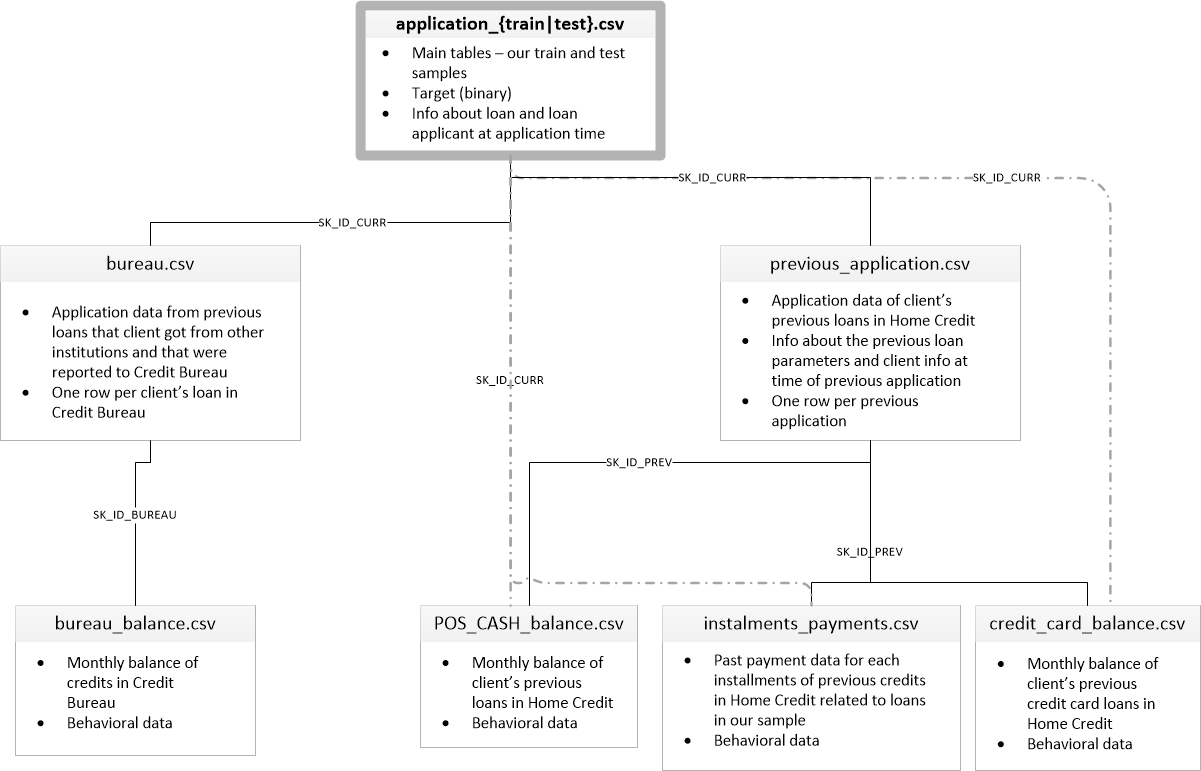

* ## application_{train|test}.csv

Il s'agit de la table principale, divisée en deux fichiers pour Train (avec TARGET) et Test (sans TARGET).
Données statiques pour toutes les applications. Une ligne représente un prêt dans notre échantillon de données.

* ## bureau.csv

Tous les crédits antérieurs du client fournis par d'autres institutions financières qui ont été signalés au bureau de crédit (pour les clients qui ont un prêt dans notre échantillon).
Pour chaque prêt de notre échantillon, il y a autant de lignes que le nombre de crédits que le client avait dans le Credit Bureau avant la date de la demande.

* ## bureau_balance.csv

Soldes mensuels des crédits antérieurs au bureau de crédit.
Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent signalé au bureau de crédit - c'est-à-dire que le tableau a (#prêts dans l'échantillon * # de crédits précédents relatifs * # de mois où nous avons un historique observable pour les crédits précédents) lignes .
    
* ## POS_CASH_balance.csv

Instantanés mensuels du solde des points de vente précédents et des prêts en espèces que le demandeur avait contractés avec Home Credit.
Ce tableau a une ligne pour chaque mois d'historique de chaque crédit précédent dans Home Credit (crédit à la consommation et prêts de trésorerie) lié aux prêts de notre échantillon - c'est-à-dire que le tableau a (#prêts dans l'échantillon * # de crédits précédents relatifs * # de mois dans lequel nous avons un historique observable pour les lignes des crédits précédents).

* ## credit_card_balance.csv

Aperçus mensuels du solde des cartes de crédit précédentes que le demandeur a avec Home Credit.
Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent dans Home Credit (crédit à la consommation et prêts de trésorerie) lié aux prêts de notre échantillon - c'est-à-dire que le tableau a (#prêts dans l'échantillon * # de cartes de crédit précédentes relatives * # de mois où nous avons un historique observable pour la carte de crédit précédente) lignes.

* ## previous_application.csv

Toutes les demandes précédentes de prêts immobiliers des clients qui ont des prêts dans notre échantillon.
Il y a une ligne pour chaque demande précédente liée aux prêts dans notre échantillon de données.

* ## installments_payments.csv

Historique de remboursement des crédits précédemment décaissés en Home Credit liés aux prêts de notre échantillon.
Il y a a) une ligne pour chaque paiement effectué plus b) une ligne pour chaque paiement manqué.
Une ligne équivaut à un versement d'une échéance OU une échéance correspondant à un versement d'un précédent crédit immobilier lié aux crédits de notre échantillon.

* ## AccueilCredit_columns_description.csv

Ce fichier contient les descriptions des colonnes des différents fichiers de données.

In [5]:
path = 'data/source/'
# A completer
filename_apptrain = 'application_train.csv'
filename_apptest = 'application_test.csv'

filename_bureau = 'bureau.csv'
filename_bureau_balance = 'bureau_balance.csv'
filename_ccbalance = 'credit_card_balance.csv'
filename_prevapp = 'previous_application.csv'
filename_POS_CASH_bal = 'POS_CASH_balance.csv'
filename_instpay = 'installments_payments.csv'

### <a name="C23"><font color='blue'>2.3 Import DataFrames</font></a> 

In [6]:
df = pd.read_csv(path+filename_apptrain,index_col = 'SK_ID_CURR' )

### Balanced data TARGET

In [7]:
%whos

Variable                  Type         Data/Info
------------------------------------------------
LabelEncoder              type         <class 'sklearn.preproces<...>ing._label.LabelEncoder'>
MinMaxScaler              type         <class 'sklearn.preproces<...>sing._data.MinMaxScaler'>
OneHotEncoder             type         <class 'sklearn.preproces<...>_encoders.OneHotEncoder'>
OrdinalEncoder            type         <class 'sklearn.preproces<...>encoders.OrdinalEncoder'>
StandardScaler            type         <class 'sklearn.preproces<...>ng._data.StandardScaler'>
VarianceThreshold         ABCMeta      <class 'sklearn.feature_s<...>shold.VarianceThreshold'>
df                        DataFrame                TARGET NAME_C<...>07511 rows x 121 columns]
entropy                   function     <function entropy at 0x0000019FC02D8820>
f1_score                  function     <function f1_score at 0x0000019FC0D2E1F0>
filename_POS_CASH_bal     str          POS_CASH_balance.csv
filename_apptest

# <a name="C3"><font color='teal'>**Partie 3 : Analyse exploratoire et etude des jeux de données EDA**</font></a> 

### <a name="C31"><font color='teal'>3.1 Display</font></a>

In [8]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df.columns.to_list()

['TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BU

In [10]:
df.tail()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,675000.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [11]:
df.sample(5)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
236875,0,Cash loans,M,Y,N,2,263250.0,808650.0,26217.0,675000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
398659,0,Cash loans,F,Y,N,0,337500.0,1237500.0,32773.5,1237500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
431664,1,Cash loans,F,N,N,0,90000.0,545040.0,26509.5,450000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
381148,0,Cash loans,F,Y,N,0,112500.0,495000.0,21802.5,495000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
102961,0,Cash loans,F,N,Y,0,72000.0,1129500.0,31059.0,1129500.0,...,0,0,0,0,0.0,0.0,0.0,2.0,1.0,3.0


### <a name="C32"><font color='teal'>3.2 Structure du dataframe</font></a> 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Columns: 121 entries, TARGET to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 286.2+ MB


In [13]:
df.dtypes.value_counts()

float64    65
int64      40
object     16
dtype: int64

In [14]:
# Modification directe de l'attribut
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df.nunique()

TARGET                               2
NAME_CONTRACT_TYPE                   2
CODE_GENDER                          3
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
CNT_CHILDREN                        15
AMT_INCOME_TOTAL                  2548
AMT_CREDIT                        5603
AMT_ANNUITY                      13672
AMT_GOODS_PRICE                   1002
NAME_TYPE_SUITE                      7
NAME_INCOME_TYPE                     8
NAME_EDUCATION_TYPE                  5
NAME_FAMILY_STATUS                   6
NAME_HOUSING_TYPE                    6
REGION_POPULATION_RELATIVE          81
DAYS_BIRTH                       17460
DAYS_EMPLOYED                    12574
DAYS_REGISTRATION                15688
DAYS_ID_PUBLISH                   6168
OWN_CAR_AGE                         62
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE                     2
FLAG_PHONE               

## Suppression des variables ne possedant qu'une seul valeur

In [15]:
col_uniq_to_drop = df.columns[(df.nunique()==1)]

In [16]:
df.drop(columns=col_uniq_to_drop,inplace=True)

#### variables discretes

In [17]:
df.select_dtypes(exclude=object).nunique()

TARGET                               2
CNT_CHILDREN                        15
AMT_INCOME_TOTAL                  2548
AMT_CREDIT                        5603
AMT_ANNUITY                      13672
AMT_GOODS_PRICE                   1002
REGION_POPULATION_RELATIVE          81
DAYS_BIRTH                       17460
DAYS_EMPLOYED                    12574
DAYS_REGISTRATION                15688
DAYS_ID_PUBLISH                   6168
OWN_CAR_AGE                         62
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE                     2
FLAG_PHONE                           2
FLAG_EMAIL                           2
CNT_FAM_MEMBERS                     17
REGION_RATING_CLIENT                 3
REGION_RATING_CLIENT_W_CITY          3
HOUR_APPR_PROCESS_START             24
REG_REGION_NOT_LIVE_REGION           2
REG_REGION_NOT_WORK_REGION           2
LIVE_REGION_NOT_WORK_REGION          2
REG_CITY_NOT_LIVE_CITY   

In [18]:
var_discret = df.select_dtypes(exclude=object).nunique().index[df.select_dtypes(exclude=object).nunique()<=35].tolist()
var_discret.remove('TARGET')
print(var_discret)

['CNT_CHILDREN', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_RE

In [19]:
def entropy1(labels, base=None):
  value,counts = np.unique(labels, return_counts=True)
  return entropy(counts, base=base)

### <a name="C33"><font color='teal'>3.3 Les valeurs manquantes et les doublons du dataframes</font></a> 

#### <font color='teal'>3.3.a Analyse des doublons du dataframes</font>

In [20]:
print("Il y a {} lignes dupliquées".format(df.duplicated().sum()))

Il y a 0 lignes dupliquées


In [21]:
print("Il y a {} lignes dupliquées".format( df.duplicated().sum() ))
print("Il y a {} clés primaires dupliquées".format( df.reset_index()["SK_ID_CURR"].duplicated().sum() ))

Il y a 0 lignes dupliquées
Il y a 0 clés primaires dupliquées


#### <font color='teal'>3.3.b Analyse et Traitement des valeurs manquantes du dataframes</font>

In [22]:
df.apply(lambda x: np.sum(x=="XNA"))

TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         4
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         0
AMT_GOODS_PRICE                     0
NAME_TYPE_SUITE                     0
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                         0
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL  

In [23]:
colna = dict()
for col in df.columns:
    if any(df[col]=='XNA'):
        print(col,' : {} nombre de Xna'.format( np.sum(df[col]=='XNA') ))
    

CODE_GENDER  : 4 nombre de Xna
ORGANIZATION_TYPE  : 55374 nombre de Xna


In [24]:
#suppression des modalités XNA
df = df.loc[df.CODE_GENDER != 'XNA']
df[df=='XNA']=np.nan

In [25]:
#les variables misc_data
try:
    import missingno as msno
    msno.bar(df)
except:
    print('some errors!!!!');

some errors!!!!


In [26]:
def compute_nb_mising_values(data):
    """
    Cree un dataframe pandas qui contient le nombre de valeurs par colonnes de l'argument data
    """
    valeurs = {}
    
    for col in data.columns:
        valeurs[col] = []
        valeurs[col].append(round((data[col].notna().sum()/data.shape[0])*100,2))
        valeurs[col].append(data[col].isna().sum())
        
    return pd.DataFrame.from_dict(data=valeurs, orient='index',
                                  columns = ["Taux de valeurs non nulles", "Nombre de valeurs manquantes"]
                                 ).sort_values(by="Nombre de valeurs manquantes",ascending=True)

In [27]:
# Modification directe de l'attribut
pd.options.display.max_columns = None
pd.options.display.max_rows = None
compute_nb_mising_values(df)

,Taux de valeurs non nulles,Nombre de valeurs manquantes
TARGET,100.00,0
HOUR_APPR_PROCESS_START,100.00,0
REG_REGION_NOT_WORK_REGION,100.00,0
LIVE_REGION_NOT_WORK_REGION,100.00,0
REG_CITY_NOT_LIVE_CITY,100.00,0
REG_CITY_NOT_WORK_CITY,100.00,0
LIVE_CITY_NOT_WORK_CITY,100.00,0
FLAG_DOCUMENT_21,100.00,0
FLAG_DOCUMENT_20,100.00,0
FLAG_DOCUMENT_19,100.00,0


#### etude des colonnes catégorielles

In [28]:
compute_nb_mising_values(df.select_dtypes(exclude = np.number))

,Taux de valeurs non nulles,Nombre de valeurs manquantes
NAME_CONTRACT_TYPE,100.00,0
CODE_GENDER,100.00,0
FLAG_OWN_CAR,100.00,0
FLAG_OWN_REALTY,100.00,0
NAME_INCOME_TYPE,100.00,0
NAME_EDUCATION_TYPE,100.00,0
NAME_FAMILY_STATUS,100.00,0
NAME_HOUSING_TYPE,100.00,0
WEEKDAY_APPR_PROCESS_START,100.00,0
NAME_TYPE_SUITE,99.58,1292


#### etude des colonnes numériques

In [29]:
compute_nb_mising_values(df.select_dtypes(np.number))

,Taux de valeurs non nulles,Nombre de valeurs manquantes
TARGET,100.00,0
REG_CITY_NOT_WORK_CITY,100.00,0
LIVE_CITY_NOT_WORK_CITY,100.00,0
FLAG_DOCUMENT_2,100.00,0
FLAG_DOCUMENT_21,100.00,0
FLAG_DOCUMENT_20,100.00,0
FLAG_DOCUMENT_19,100.00,0
FLAG_DOCUMENT_18,100.00,0
FLAG_DOCUMENT_17,100.00,0
FLAG_DOCUMENT_16,100.00,0


<Axes: >

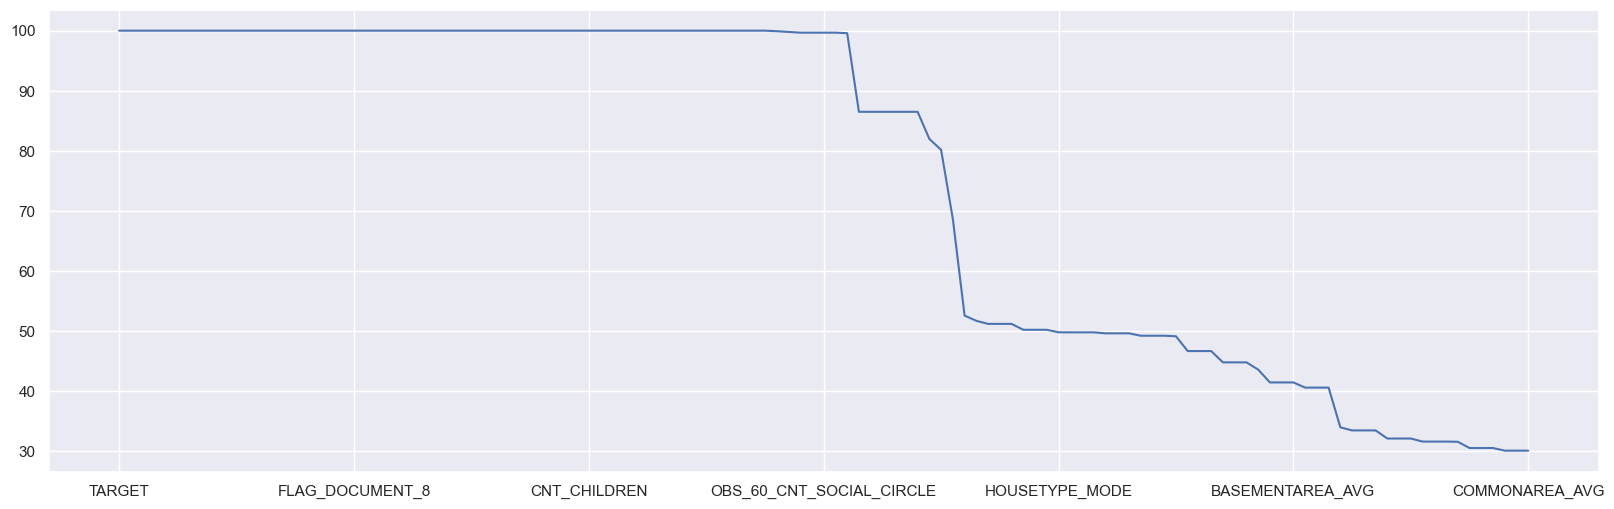

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=1,  figsize=(20, 6))
compute_nb_mising_values(df)['Taux de valeurs non nulles'].plot(ax= axes)

In [31]:
# Remplacement de NA des variable catégorielle par Xna
df_cleaned = df.copy()
for x in ['FONDKAPREMONT_MODE','HOUSETYPE_MODE','NAME_TYPE_SUITE','OCCUPATION_TYPE','ORGANIZATION_TYPE']: df_cleaned[x].loc[df_cleaned[x].isna()]='XNA'

In [32]:
def drop_NA_columns(data,p):
    '''
    Select features who have more than p% if p<1 na value   
    Select feature contains more than p na value if p>1
    '''
    feature = []
    if p > 1 and p < 100:
        na_df = data.columns[data.isna().sum() > int(p)]
    
    if p <= 1 and p > 0:
        na_df = data.columns[data.isna().sum()/data.shape[0] > p]
    
    return(na_df)

In [33]:
nbColsupp = len(drop_NA_columns(df_cleaned,p=0.22))
print(drop_NA_columns(df_cleaned,p=0.20),'\n\n Au total cela représente', nbColsupp, 
      'colonnes. Soit {:.2%} du nombre de colonnes total'.format(nbColsupp/len(df.columns))
     )

del nbColsupp

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'TO

#### <div class="alert alert-info"><font color='teal'> Suppression des colonnes dont plus de 20% des valeurs sont manquantes </font></div>

In [34]:
col_to_drop = drop_NA_columns(df_cleaned,p=0.22).tolist()

#col_to_drop.remove("OCCUPATION_TYPE") 
col_to_drop.extend(["WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START"])
df_cleaned.shape

(307507, 121)

In [35]:
df_cleaned = df_cleaned.drop(columns=col_to_drop,inplace=False)
df_cleaned.shape

(307507, 72)

In [36]:
col_to_drop

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTAT

In [37]:
#les variables misc_data
try:
    import missingno as msno
    msno.bar(df_cleaned);
except:
    print('Some ERRORS when visualization!!!')

Some ERRORS when visualization!!!


### <a name="C34"><font color='teal'>3.4 Data inspections</font></a> 

In [38]:
# variables numeriques
df_cleaned.filter(df.columns[~df.columns.isin(var_discret)]).describe()

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE
count,307507.00000,3.075070e+05,3.075070e+05,307495.000000,3.072290e+05,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,3.068470e+05,246542.000000,307506.000000
mean,0.08073,1.687977e+05,5.990286e+05,27108.666786,5.383977e+05,0.020868,-16037.027271,63815.929208,-4986.131376,-2994.201670,5.143918e-01,0.510856,-962.860546
std,0.27242,2.371246e+05,4.024926e+05,14493.798379,3.694472e+05,0.013831,4363.982424,141276.472519,3522.883030,1509.454566,1.910603e-01,0.194843,826.811491
min,0.00000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,8.173617e-08,0.000527,-4292.000000
25%,0.00000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,3.924574e-01,0.370650,-1570.000000
50%,0.00000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,5.659614e-01,0.535276,-757.000000
75%,0.00000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,6.636171e-01,0.669057,-274.000000
max,1.00000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,8.549997e-01,0.896010,0.000000


In [39]:
# variables catégorielles
df_cleaned.describe(exclude = [np.number]) #/include = [objet]/["category"]

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE
count,307507,307507,307507,307507,307507,307507,307507,307507,307507,307507,307507,307507,307507
unique,2,2,2,2,8,8,5,6,6,19,58,5,4
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,XNA,Business Entity Type 3,XNA,XNA
freq,278232,202448,202922,213308,248523,158771,218389,196429,272865,96389,67992,210293,154296


In [40]:
# variables discretes
df_cleaned[set(var_discret).intersection(df_cleaned.columns)]\
.astype(object).describe() #/include = [objet]/["category"]

,OBS_30_CNT_SOCIAL_CIRCLE,FLAG_EMAIL,AMT_REQ_CREDIT_BUREAU_YEAR,FLAG_DOCUMENT_11,AMT_REQ_CREDIT_BUREAU_MON,FLAG_DOCUMENT_15,LIVE_REGION_NOT_WORK_REGION,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,FLAG_PHONE,FLAG_DOCUMENT_12,LIVE_CITY_NOT_WORK_CITY,AMT_REQ_CREDIT_BUREAU_WEEK,REG_REGION_NOT_LIVE_REGION,FLAG_DOCUMENT_4,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_QRT,CNT_FAM_MEMBERS,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_5,AMT_REQ_CREDIT_BUREAU_DAY,FLAG_DOCUMENT_14,FLAG_MOBIL,FLAG_DOCUMENT_3,FLAG_DOCUMENT_8,FLAG_DOCUMENT_21,FLAG_DOCUMENT_18,FLAG_DOCUMENT_17,AMT_REQ_CREDIT_BUREAU_HOUR,FLAG_DOCUMENT_13,REG_REGION_NOT_WORK_REGION,FLAG_DOCUMENT_16,CNT_CHILDREN,REG_CITY_NOT_WORK_CITY,FLAG_EMP_PHONE,FLAG_DOCUMENT_9,FLAG_DOCUMENT_2,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_19,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,FLAG_DOCUMENT_20,FLAG_WORK_PHONE
count,306486.0,307507,265988.0,307507,265988.0,307507,307507,307507,307507,307507,307507,307507,265988.0,307507,307507,306486.0,306486.0,306486.0,265988.0,307505.0,307507,307507,307507,265988.0,307507,307507,307507,307507,307507,307507,307507,265988.0,307507,307507,307507,307507,307507,307507,307507,307507,307507,307507,307507,307507,307507,307507
unique,33.0,2,25.0,2,24.0,2,2,2,2,2,2,2,9.0,2,2,33.0,10.0,9.0,11.0,17.0,2,2,2,9.0,2,2,2,2,2,2,2,5.0,2,2,2,15,2,2,2,2,2,2,3,3,2,2
top,0.0,0,0.0,0,0.0,0,0,1,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,2.0,0,0,0,0.0,0,1,1,0,0,0,0,0.0,0,0,0,0,0,1,0,0,0,0,2,2,0,0
freq,163908.0,290065,71801.0,306304,222230.0,307135,295004,306933,307500,221080,307505,252292,257452.0,302850,307482,164664.0,271322.0,280719.0,215414.0,158355.0,280429,307448,302859,264499.0,306604,307506,218340,282483,307404,305007,307425,264362.0,306423,291895,304454,215369,236640,252121,306309,307494,283468,307324,229481,226981,307351,246203


#### <font color='teal'> - 3.4.1 Data target categorielle</font>

In [41]:
pd.DataFrame({'Effectif' : df_cleaned['TARGET'].value_counts(),
              'Effectif en %' : df_cleaned['TARGET'].value_counts(normalize = True).round(2), # renvoie la distribution en %
             }
            )

,Effectif,Effectif en %
0,282682,0.92
1,24825,0.08


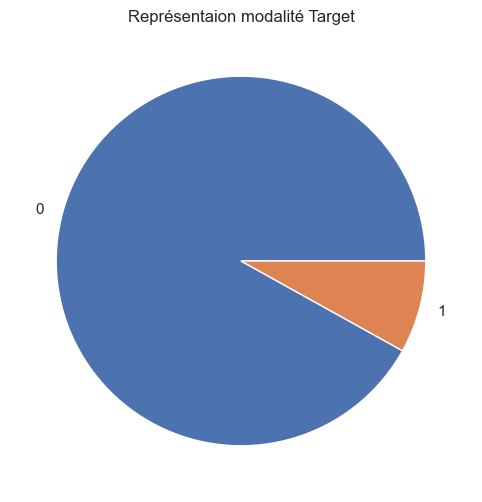

In [42]:
# diagramme en  Camembert
fig, axes = plt.subplots(nrows=1, ncols=1,  figsize=(12, 6))

axes.set_title('Représentaion modalité Target')
df_cleaned['TARGET'].value_counts().plot(kind='pie',ax =  axes,label = '')
axes.xaxis.label.set_color('red')

#### <font color='teal'> - 3.4.2 Data target numerique</font>

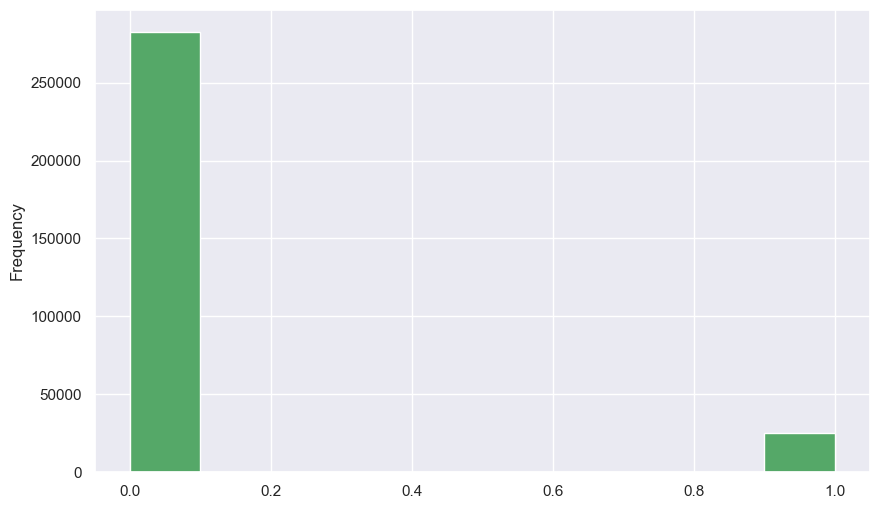

In [43]:
df_cleaned['TARGET'].astype(int).plot.hist(color = 'g');

In [44]:
df_cleaned['TARGET'].describe()

count    307507.00000
mean          0.08073
std           0.27242
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max           1.00000
Name: TARGET, dtype: float64

### <a name="C35"><font color='teal'>3.5 Data Visualisation Multivariée</font></a> 

In [45]:
# Find correlations with the target and sort
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns
correlations = df_cleaned[numeric_cols].corr()['TARGET'].sort_values(ascending=False)
#logcorrelations = df_cleaned[numeric_cols].apply(lambda x: np.log1p(x) if x.nunique()>2 else x )\
#.corr()['TARGET'].sort_values(ascending=False)

# Display correlations
print('Most Positive Correlations:\n', correlations.head(7))
print('\n\nMost Negative Correlations:\n', correlations.tail(7))

#print('\n\n\n')

# Display correlations
#print('Most Positive Correlations log features:\n', logcorrelations.head(7))
#print('\n\nMost Negative Correlations log features:\n', logcorrelations.tail(7))

Most Positive Correlations:
 TARGET                         1.000000
DAYS_BIRTH                     0.078242
REGION_RATING_CLIENT_W_CITY    0.060895
REGION_RATING_CLIENT           0.058901
DAYS_LAST_PHONE_CHANGE         0.055219
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050992
Name: TARGET, dtype: float64


Most Negative Correlations:
 FLAG_DOCUMENT_6              -0.028603
AMT_CREDIT                   -0.030371
REGION_POPULATION_RELATIVE   -0.037225
AMT_GOODS_PRICE              -0.039647
DAYS_EMPLOYED                -0.044934
EXT_SOURCE_2                 -0.160471
EXT_SOURCE_3                 -0.178926
Name: TARGET, dtype: float64


CPU times: total: 1.61 s
Wall time: 1.62 s


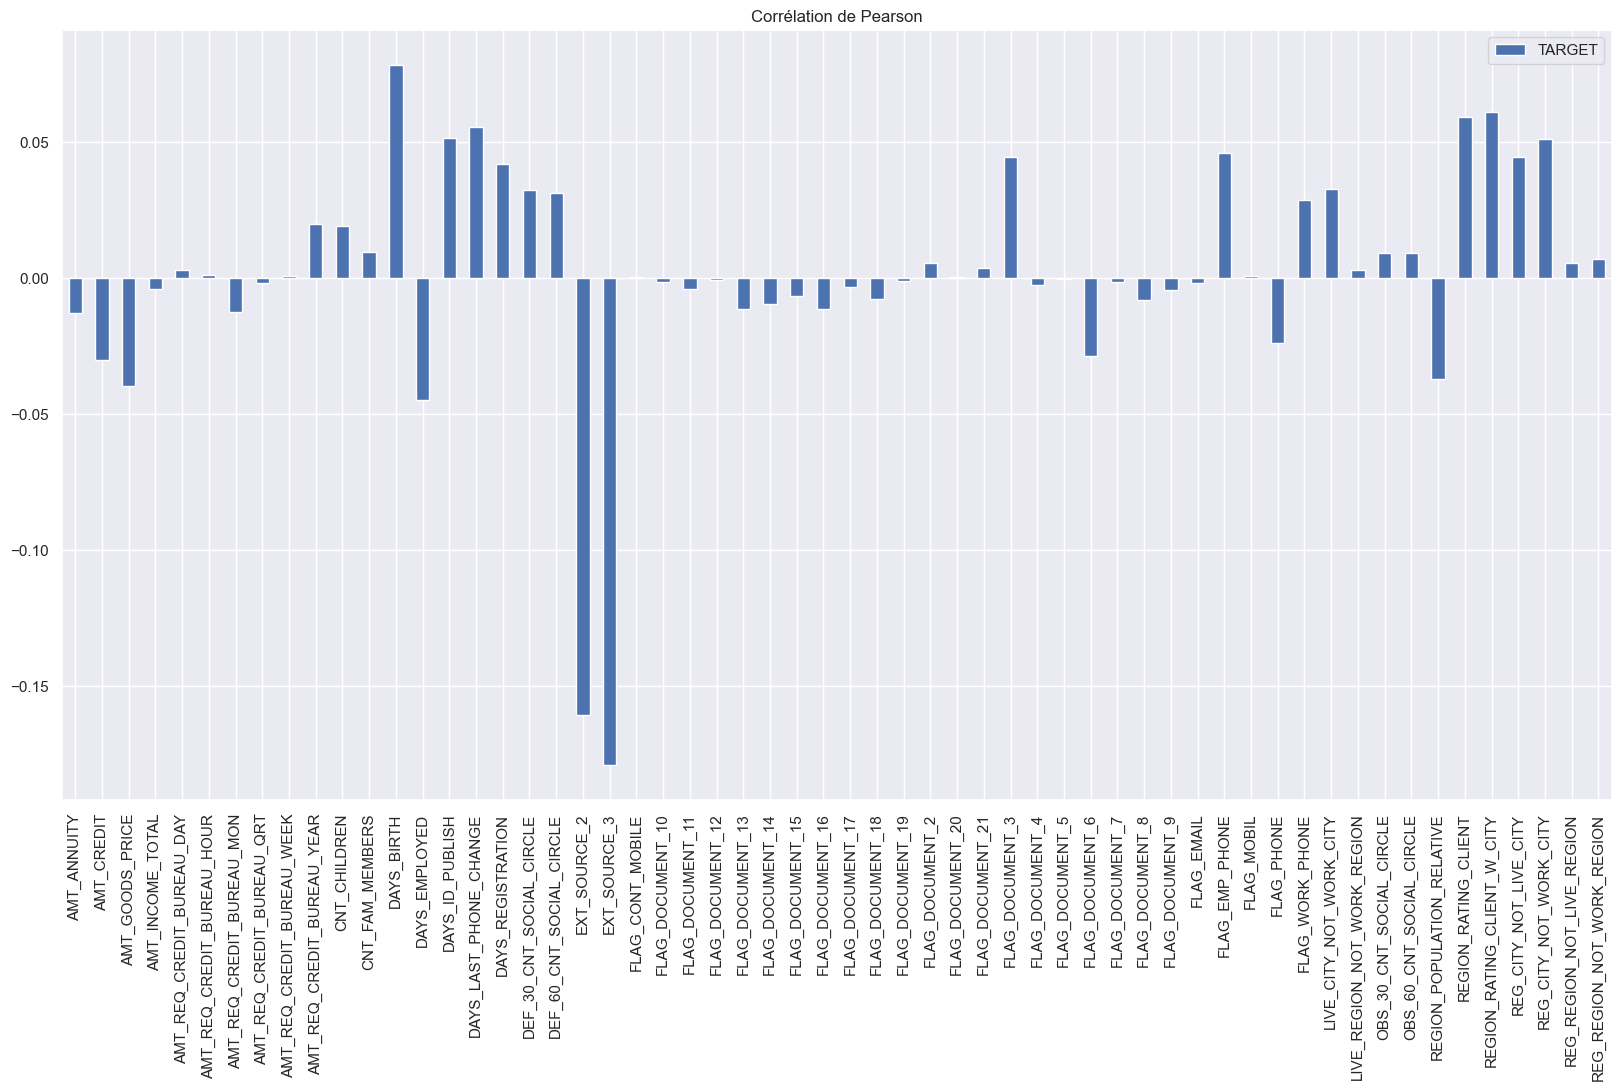

In [46]:
%%time
plt.figure(figsize=(20,10))
ax1 = plt.subplot(1, 1, 1)
df_cleaned.corr()[['TARGET']].sort_index()\
.drop(['TARGET']).plot(kind='bar',ax = ax1)
ax1.set_title("Corrélation de Pearson");

In [47]:
# Analyse de corrélation avec target
liaison_target = pd.DataFrame({'columns' : df_cleaned.columns})

#ajout de la corrélation de pearson
liaison_target = liaison_target.merge(pd.DataFrame({'correlation':df_cleaned.corr()['TARGET']}).reset_index().rename(columns={"index": "columns"}),
                     on = 'columns')

######### Test d'indépendance (test du chi2) 2 qualitatives features
from scipy.stats import chi2_contingency
features = [i for i in df_cleaned.columns if df_cleaned[i].dtype == 'object' ]
chi2dictpvalue = dict()
# Loop over the features and plot each one
for feature in features:
    # Test du chi2
    chi2, p_value, dof, expected = chi2_contingency(pd.crosstab( df_cleaned[feature],df_cleaned.TARGET))
    chi2dictpvalue[feature] = p_value
    #Ainsi, la p-value ici est de 0.0005 : il y a donc un lien statistique entre le sexe et la tranche salariale car la p-value est très petite.

#ajout de la pvalue du test de chi2
liaison_target = liaison_target.merge(pd.DataFrame({'chi2_pvalue':chi2dictpvalue}).reset_index().rename(columns={"index": "columns"}),
                     how='outer',on = 'columns')

######### Quali quanti
from scipy.stats import ttest_ind, mannwhitneyu

features = [i for i in df_cleaned.columns if df_cleaned[i].dtype != 'object' ]
Studentpvalue = dict()
MannWhitneypvalue = dict()
for feature in features:
    # Test du chi2
    # Supposons que vous ayez une variable qualitative 'variable_qualitative' et une variable quantitative 'variable_quantitative'
    group1 = df_cleaned[df_cleaned['TARGET'] == 0][feature]
    group2 = df_cleaned[df_cleaned['TARGET'] == 1][feature]
    
    # Test t de Student (pour les distributions normales) ou test de Mann-Whitney U (pour les distributions non normales)
    Studentpvalue[feature] = ttest_ind(group1, group2)[1]  # Test t de Student
    MannWhitneypvalue[feature] = mannwhitneyu(group1, group2)[1]  # Test de Mann-Whitney U

#ajout de la pvalue du test de student
liaison_target = liaison_target.merge(pd.DataFrame({'StudentTest':Studentpvalue}).reset_index().rename(columns={"index": "columns"}),
                     how='outer',on = 'columns')
#p-value < 0.05 - différence significative avec une probabilité de 95%
#p-value < 0.01 -  différence significative avec une probabilité de 99%
#p-value < 0.001 -  différence significative avec une probabilité de 99‰

#ajout de la pvalue du test de MannWhitney
liaison_target = liaison_target.merge(pd.DataFrame({'MannWhitney':MannWhitneypvalue}).reset_index().rename(columns={"index": "columns"}),
                     how='outer',on = 'columns')
liaison_target.index = liaison_target['columns']
liaison_target.drop(columns=['columns'],inplace=True)

#liaison_target.sort_values(by = 'correlation')

In [48]:
liaison_target[['chi2_pvalue']]\
.loc[liaison_target.index !='TARGET']\
.dropna()

,chi2_pvalue
columns,
CODE_GENDER,4.394091e-202
FLAG_OWN_CAR,9.410574e-34
FLAG_OWN_REALTY,6.716542e-04
FONDKAPREMONT_MODE,9.651141e-60
HOUSETYPE_MODE,4.478764e-110
NAME_CONTRACT_TYPE,1.127500e-65
NAME_EDUCATION_TYPE,2.462768e-219
NAME_FAMILY_STATUS,7.717800e-107
NAME_HOUSING_TYPE,1.105828e-88


#### <font color='teal'> - 3.5.1 Data target catégorielle</font>

In [49]:
def plot_categorical_feature(feature, df = None, orientation_horizontal = True):

    temp = df[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = df[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    df1 = df1.merge(cat_perc, on=feature)
    
    sns.set_color_codes("colorblind")
    
    fig,axes =plt.subplots(nrows = 1,ncols= 2 ,figsize=(15,5),sharey=True)
    sns.barplot(y = feature, x="Number of contracts",data=df1, ax= axes[0])
    sns.barplot(y = feature, x='TARGET', data=df1, ax= axes[1])
    axes[0].tick_params(axis='x', rotation=45)
    axes[1].tick_params(axis='x', rotation=45)
    plt.xlabel('Fraction of loans defaulted', fontsize=12)

    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.subplots_adjust(wspace = 0.6)
    plt.show();

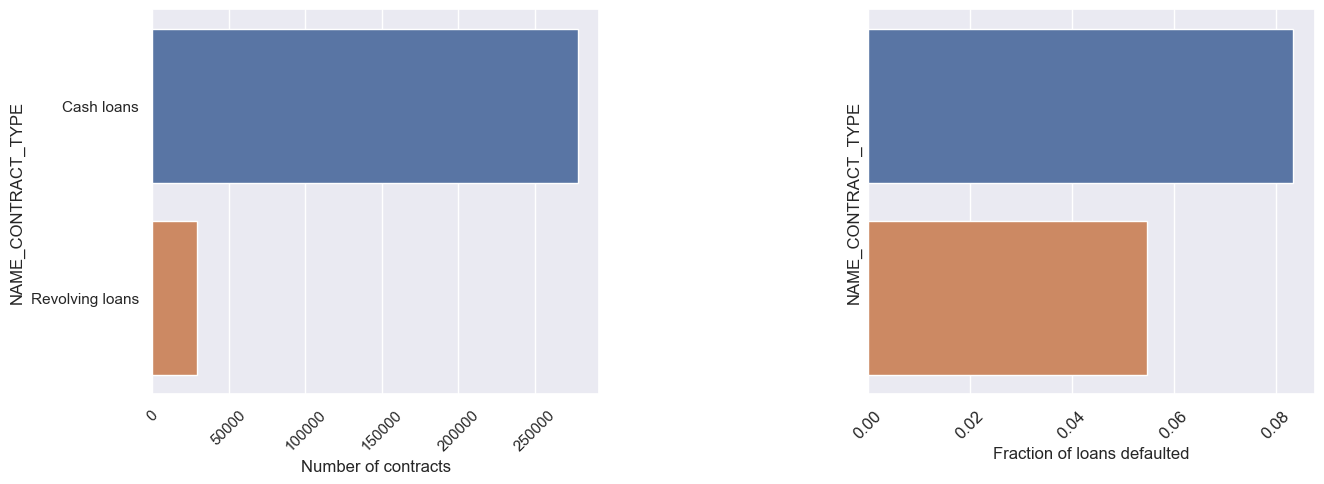

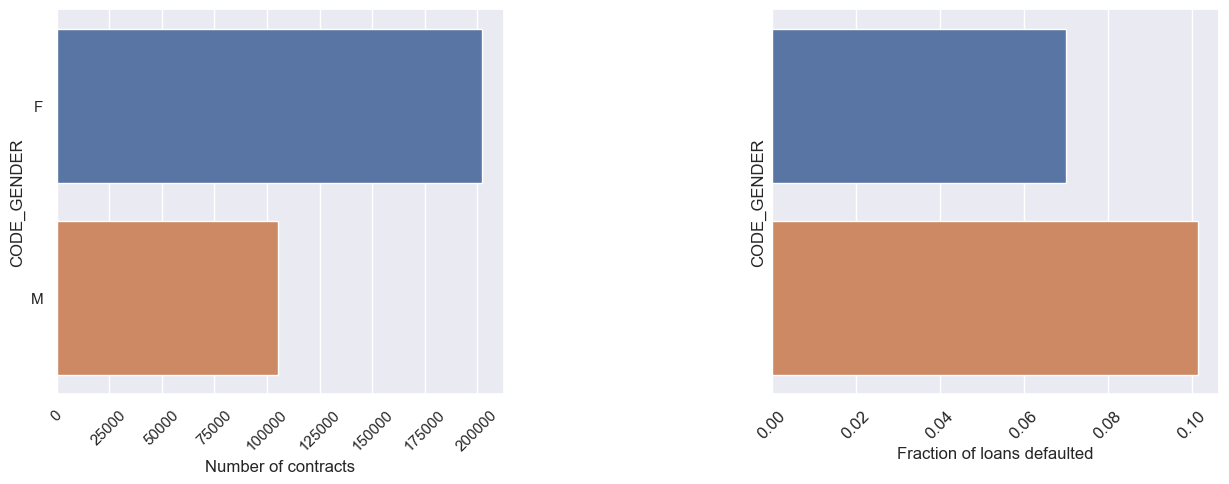

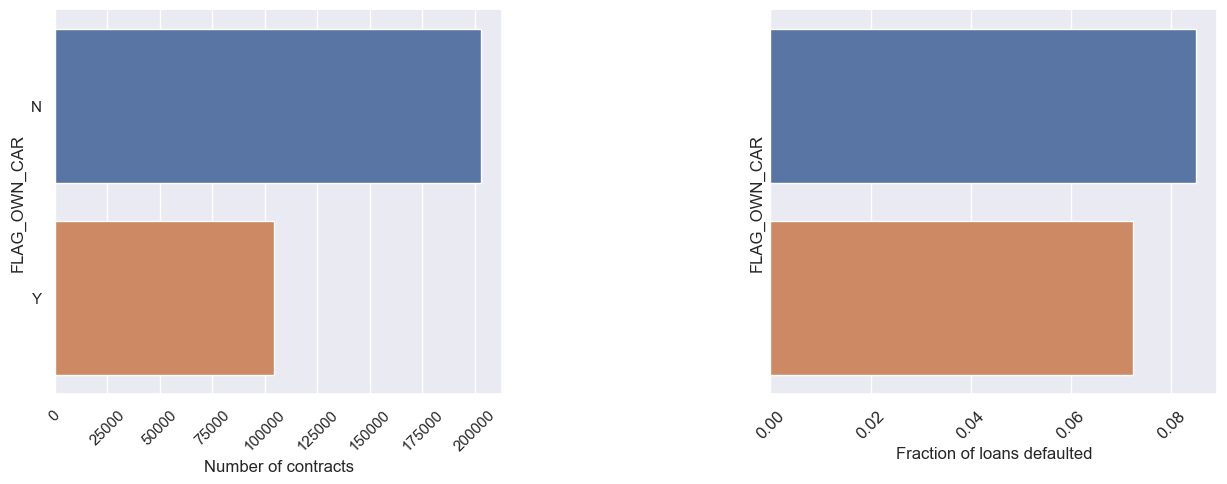

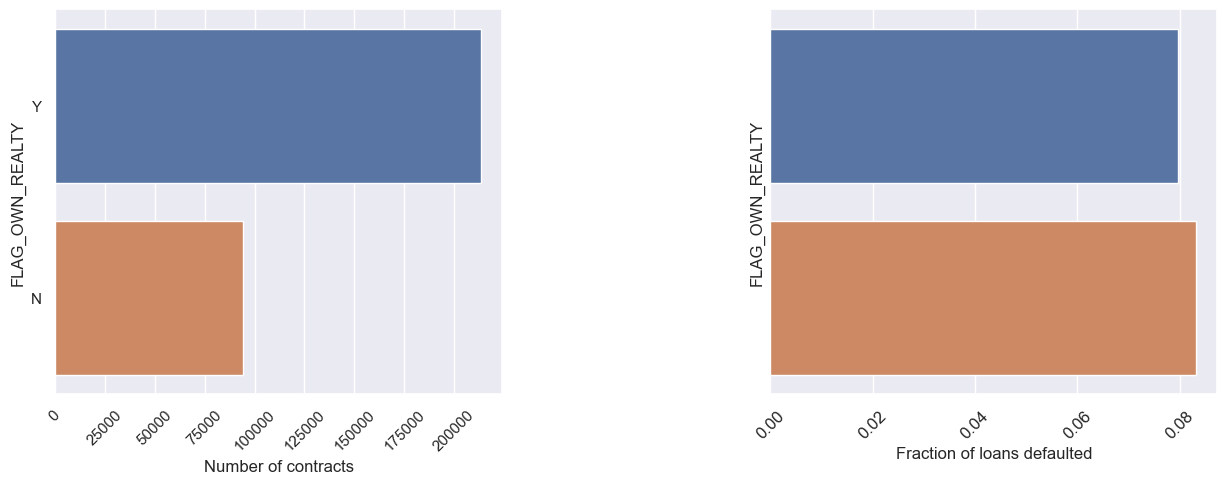

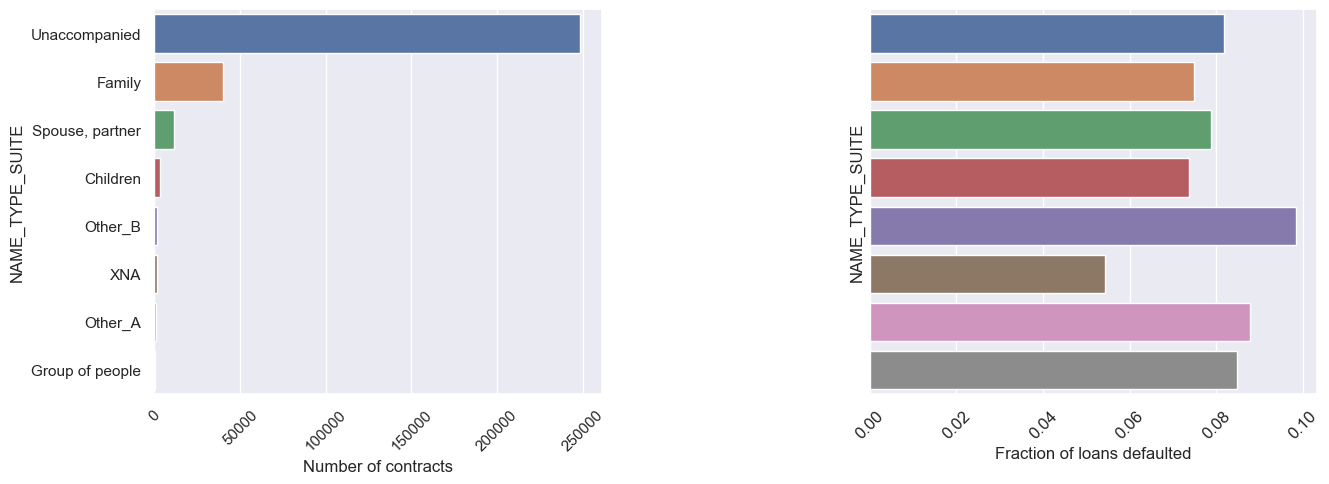

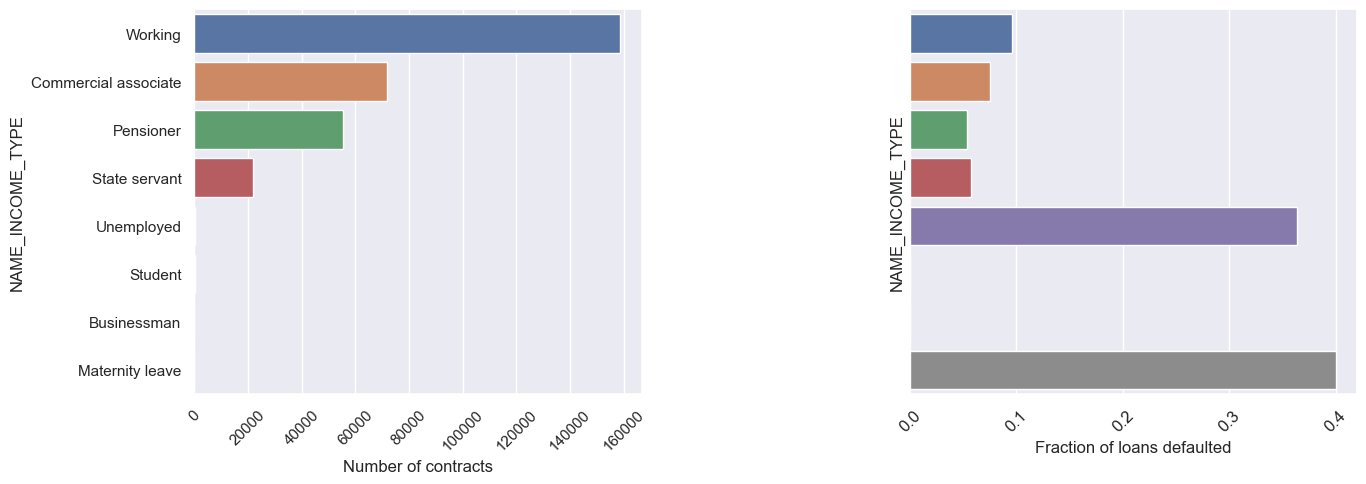

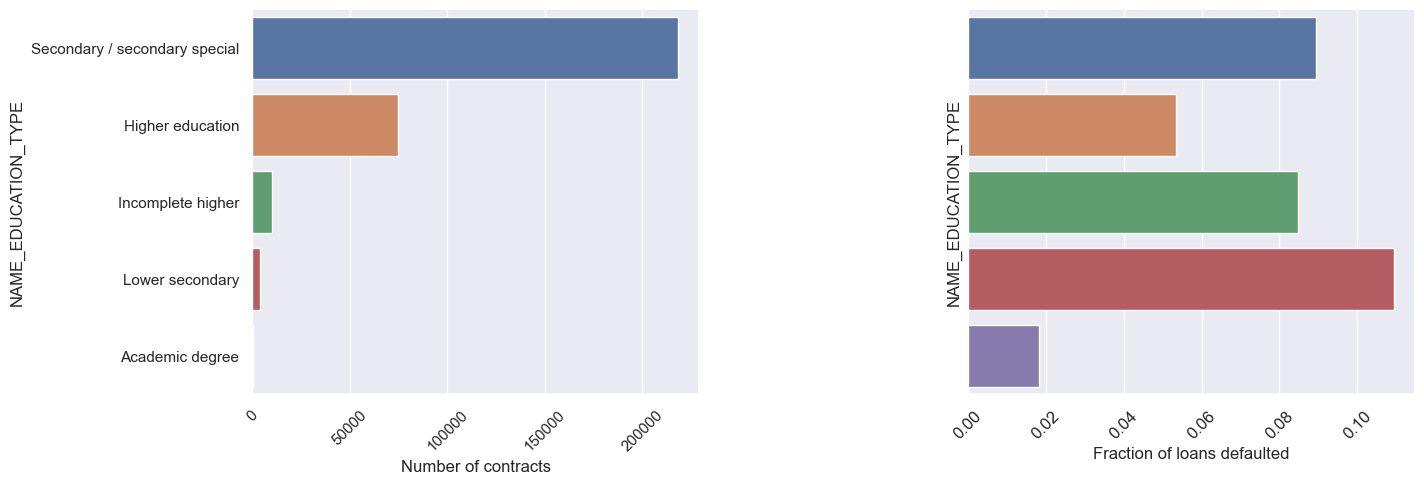

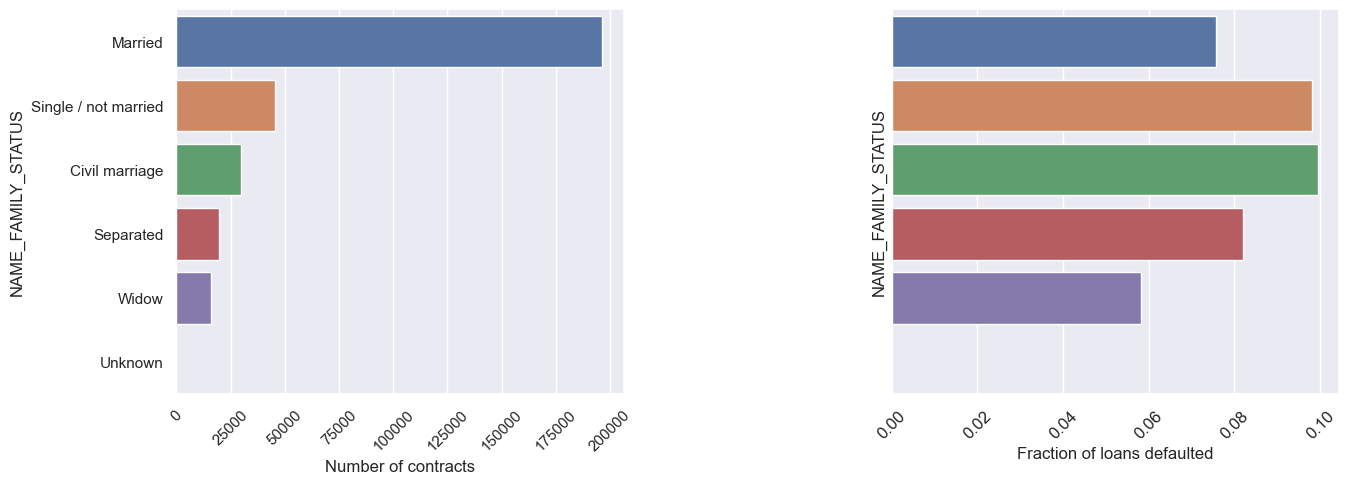

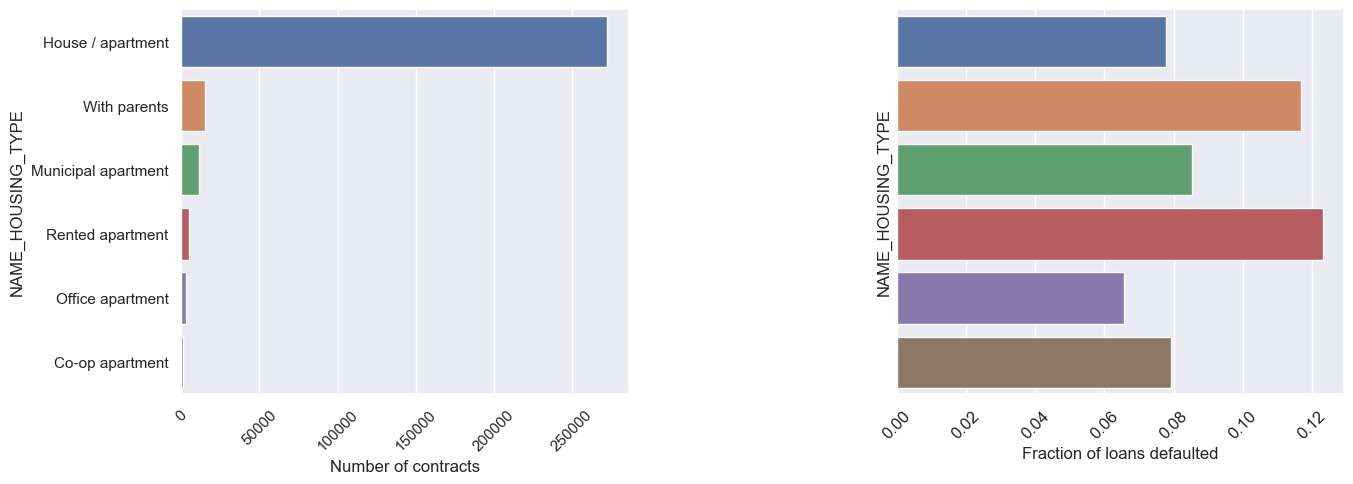

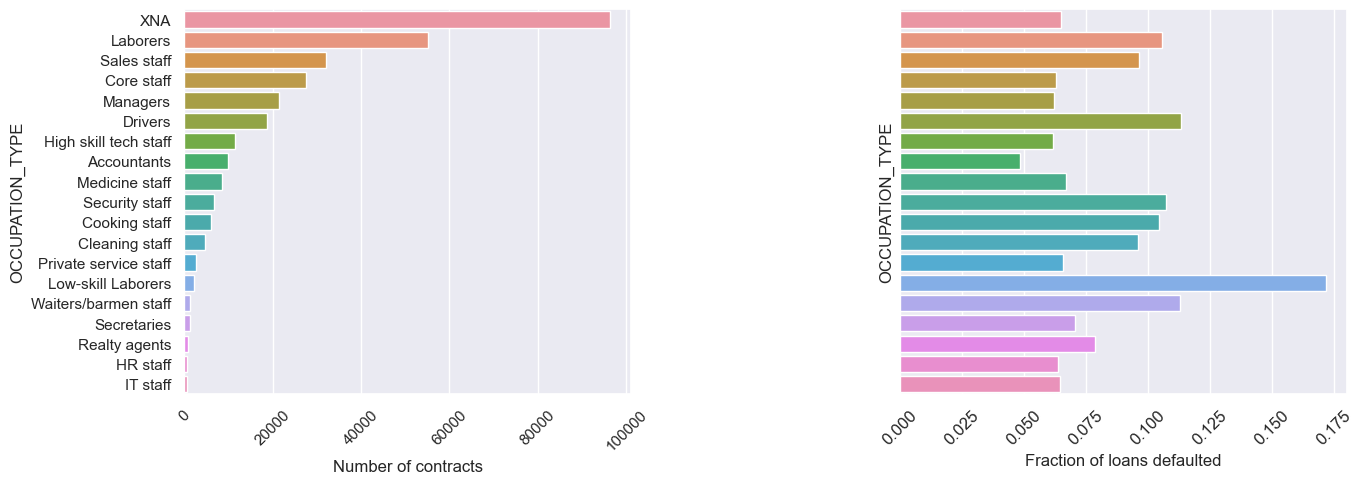

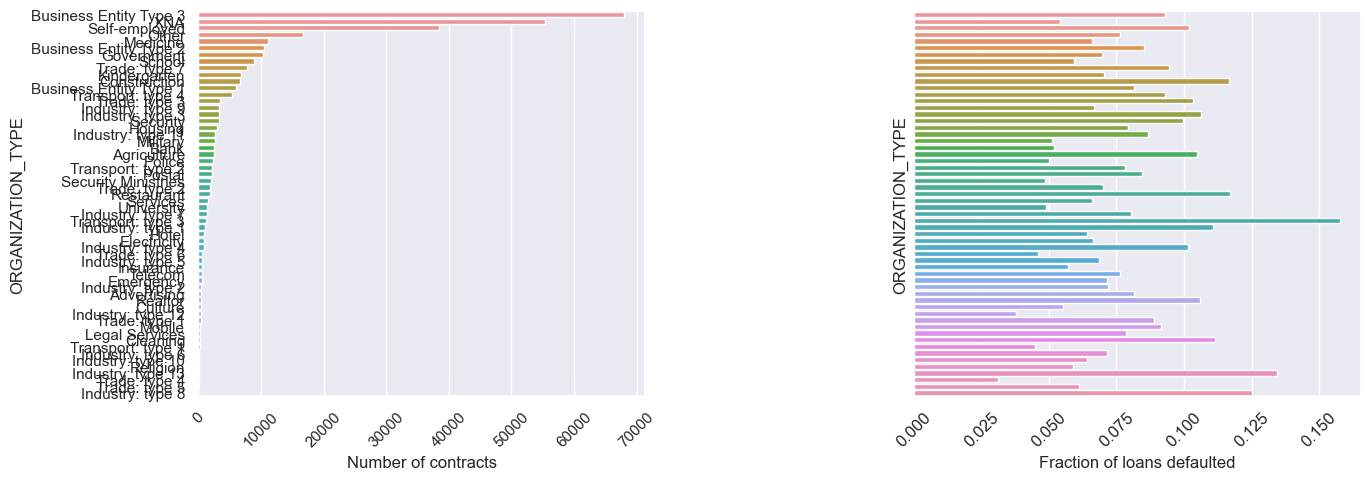

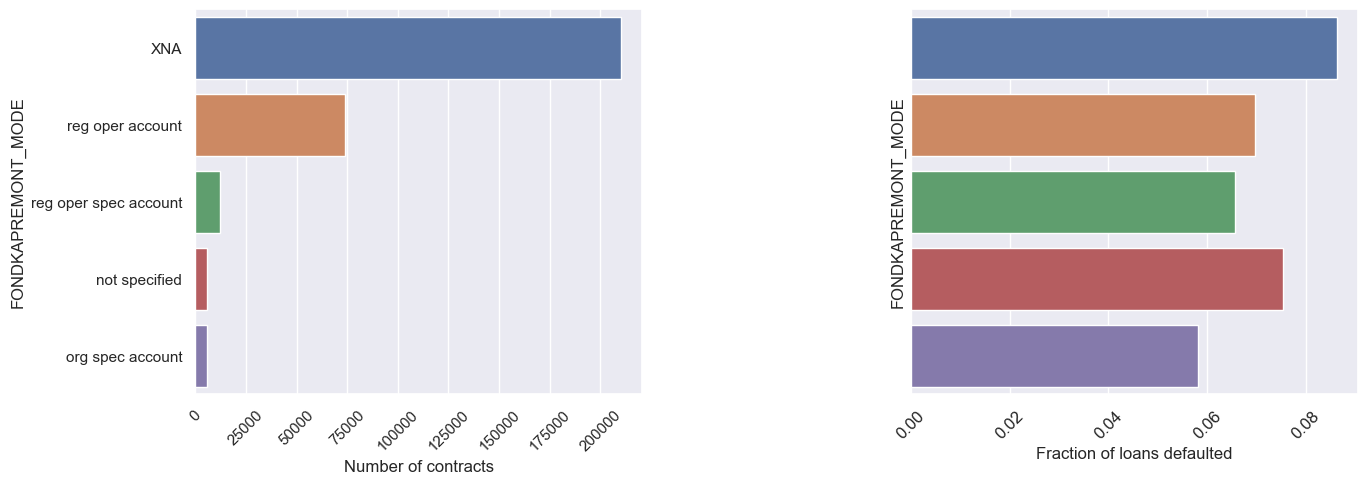

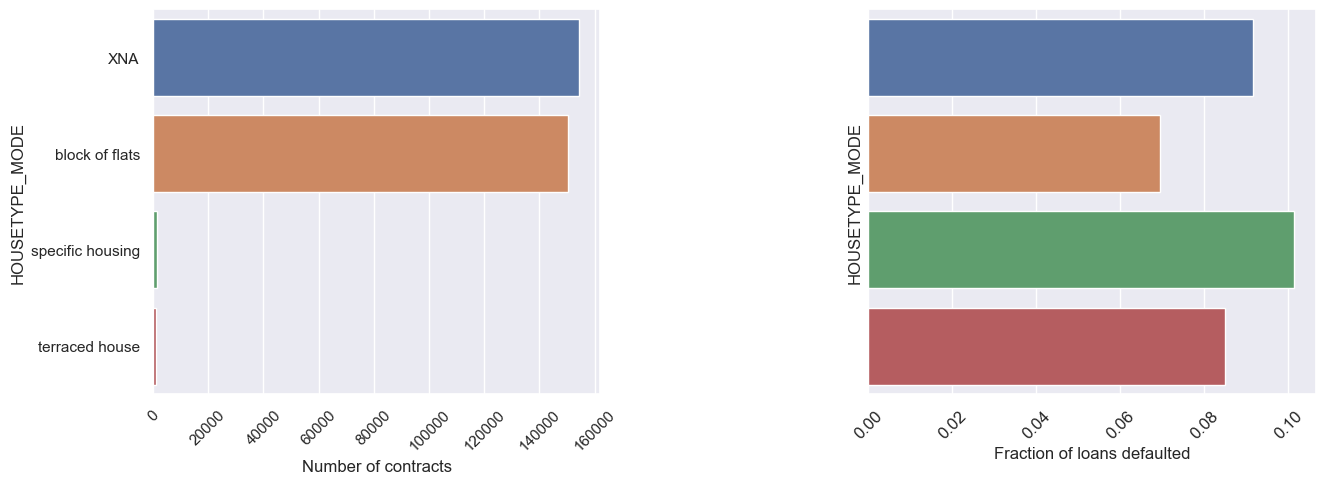

In [50]:
# Concatenate the two lists
features = [i for i in df_cleaned.columns if df_cleaned[i].dtype == 'object' ]
#features.extend(var_discret)

# Loop over the features and plot each one
for feature in features:
    plot_categorical_feature( feature,df=df_cleaned )

In [51]:
def plot_num_feature(feature, df = None, orientation_horizontal = True):
    
    sns.set_color_codes("colorblind")
    
    fig,axes =plt.subplots(nrows = 1,ncols= 1 ,figsize=(15,5),sharey=True)
    sns.boxplot(y = feature, x="TARGET",data = df, ax = axes, showfliers=False )
    plt.xlabel('Boxplot', fontsize=12)

    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.subplots_adjust(wspace = 0.6)
    plt.show();

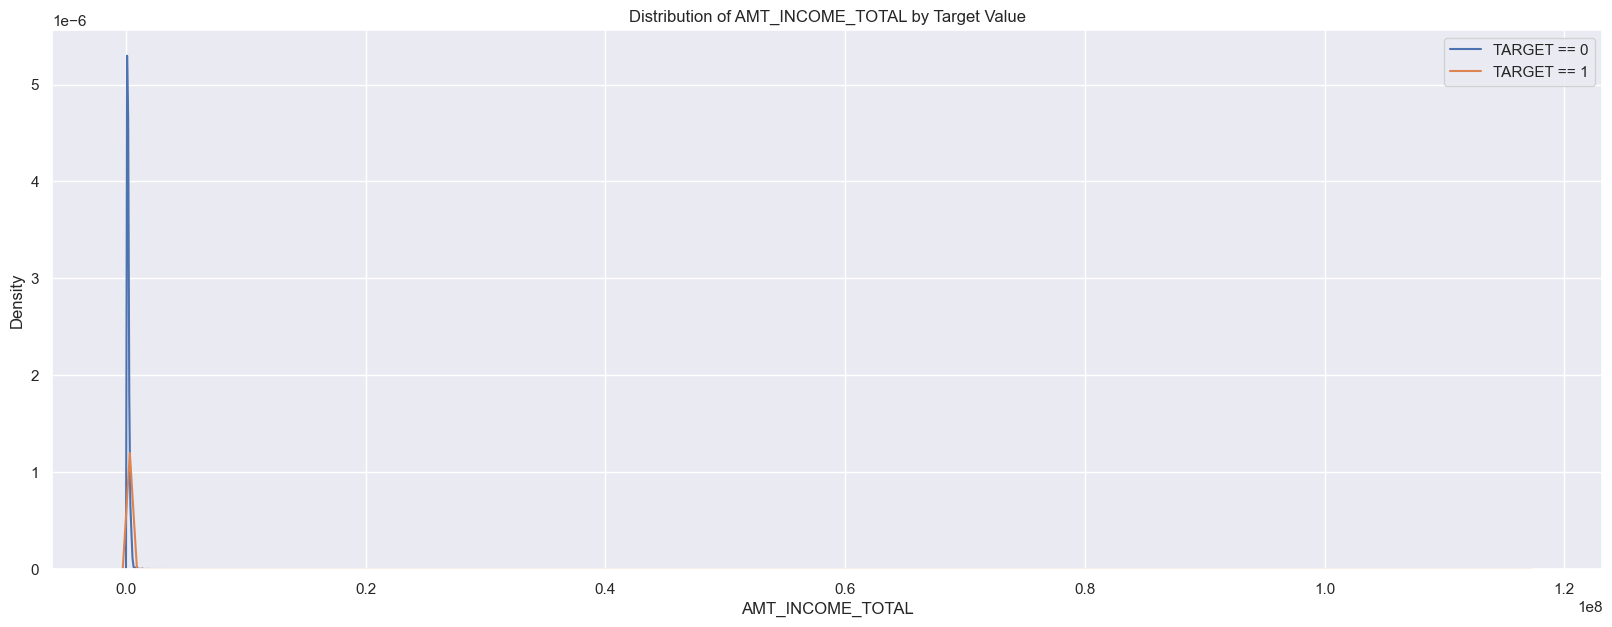

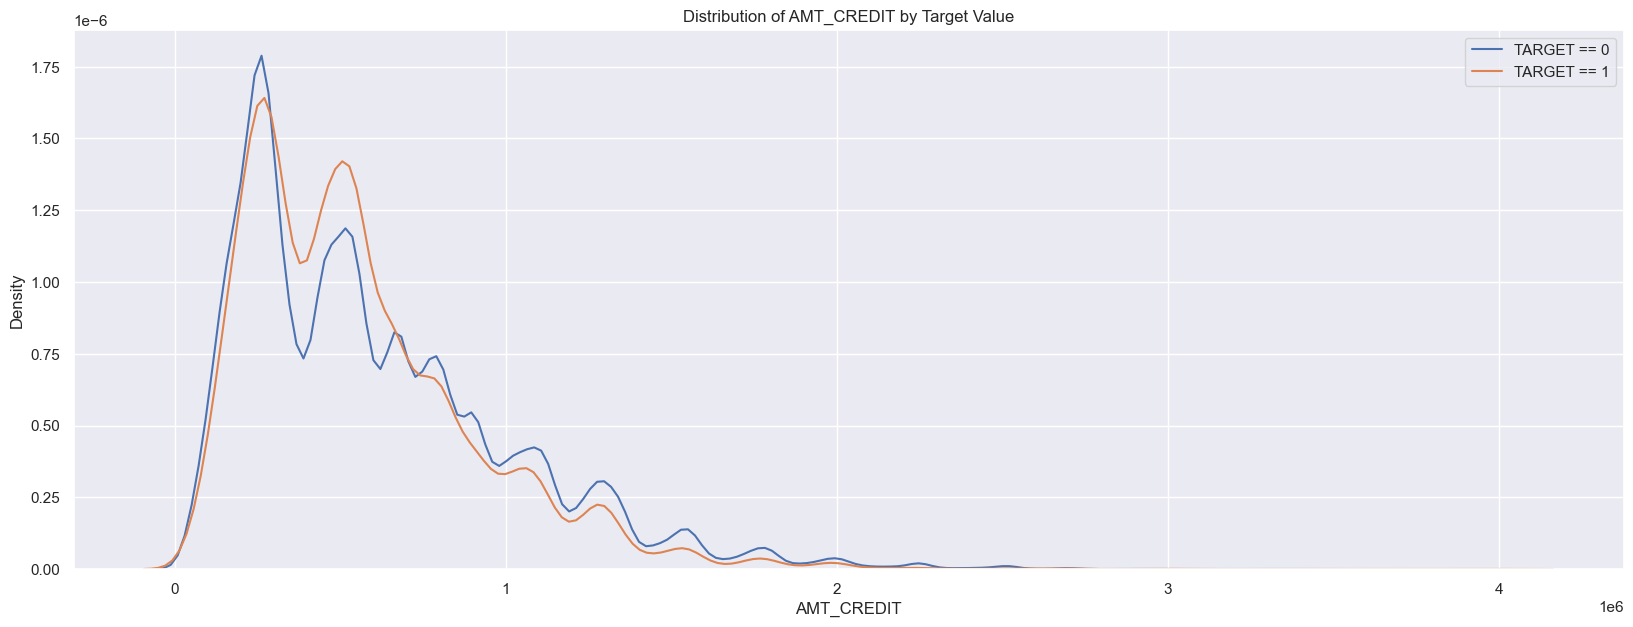

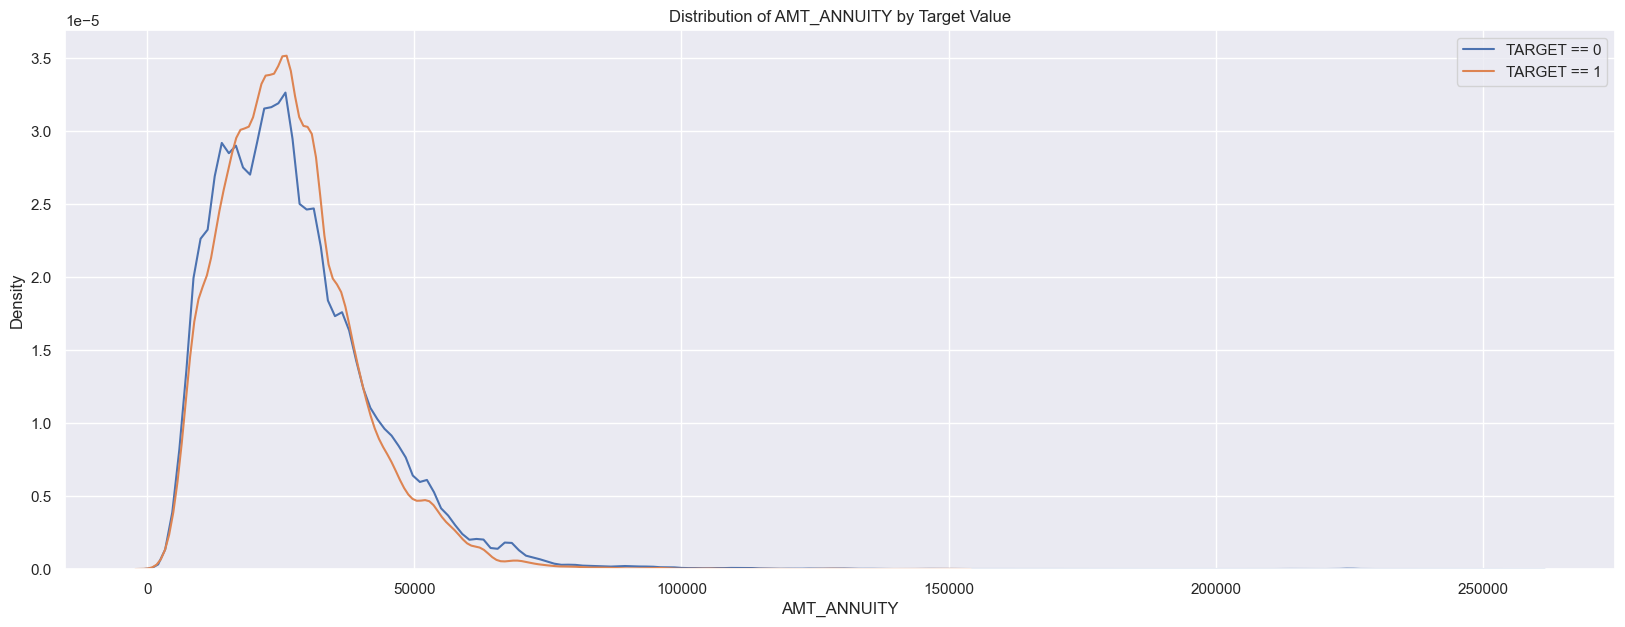

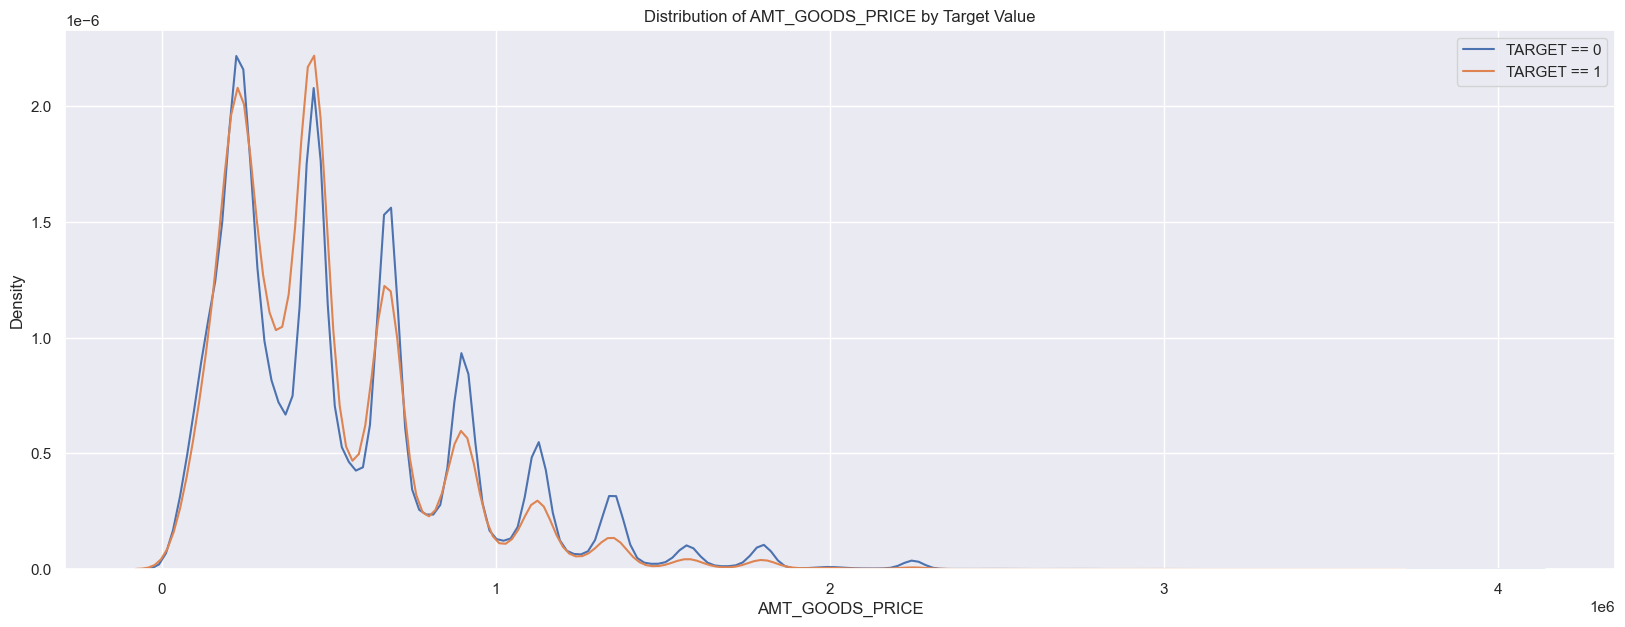

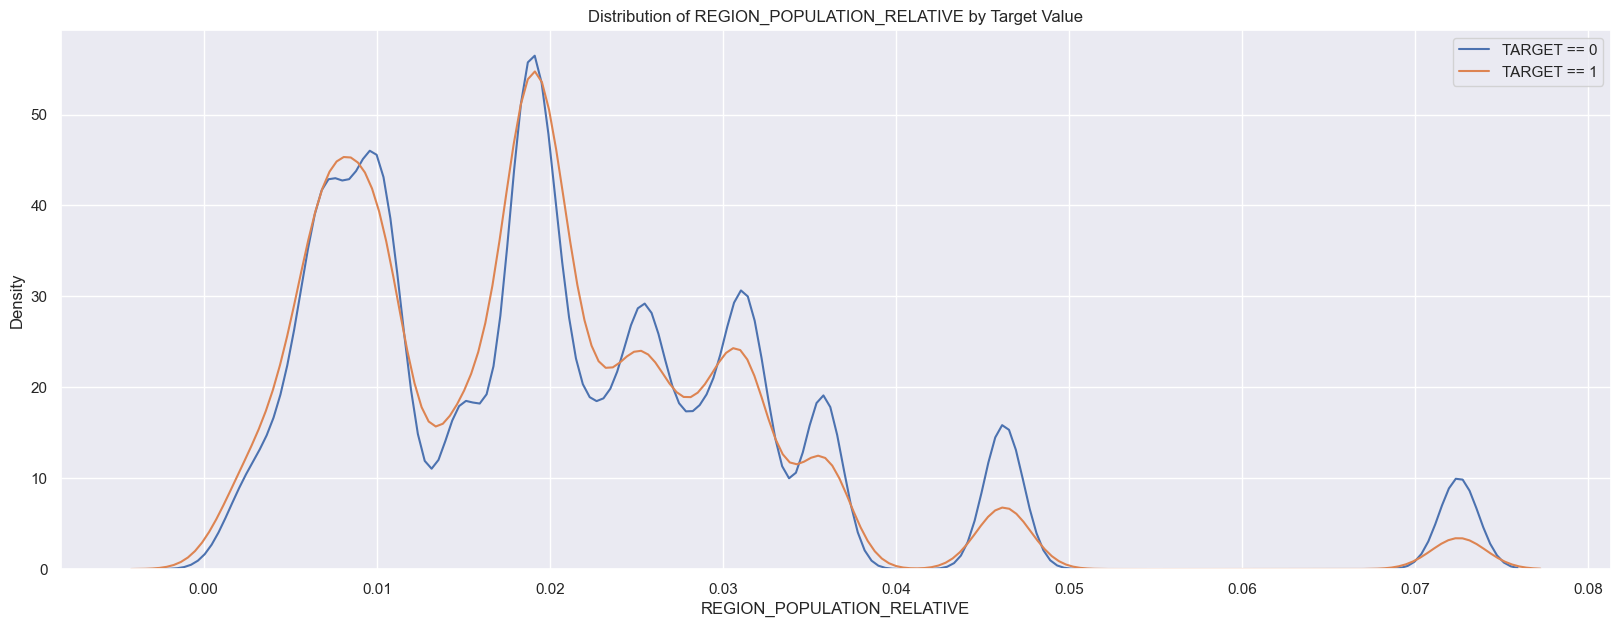

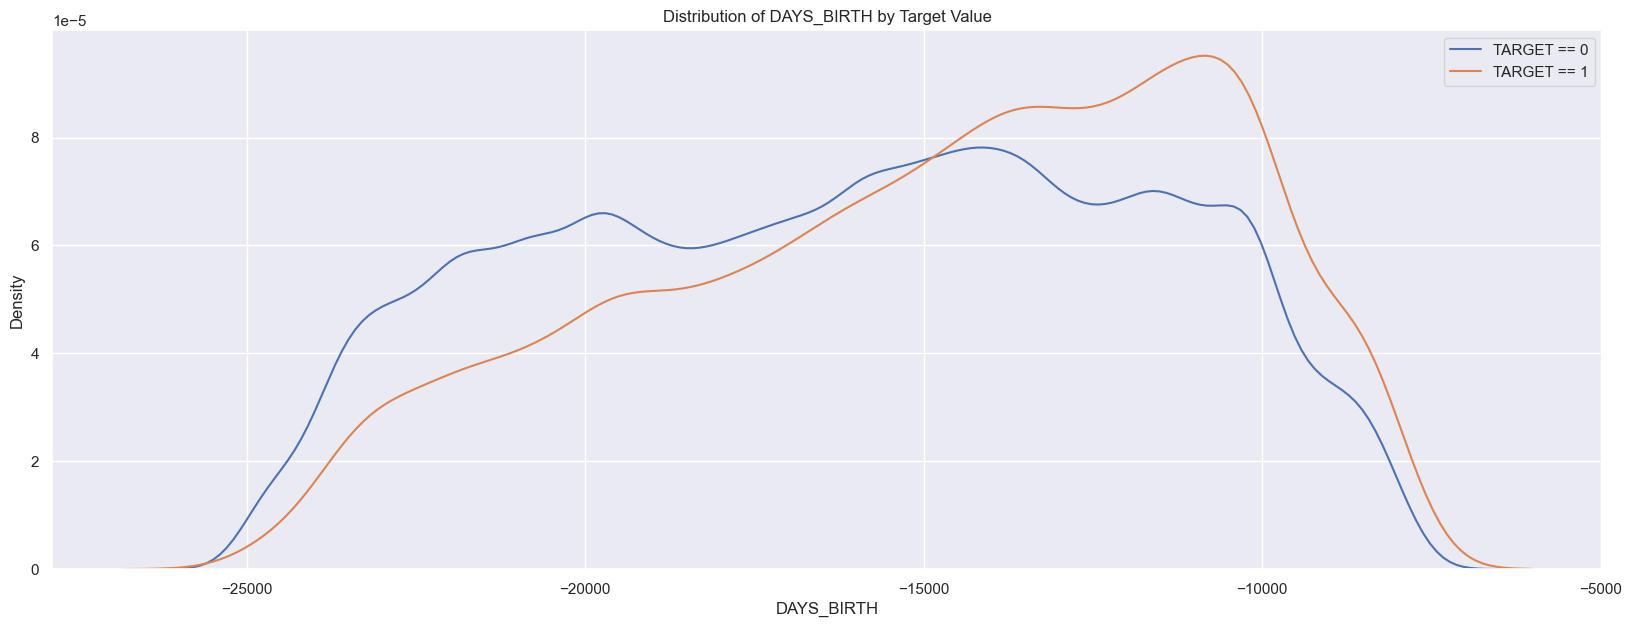

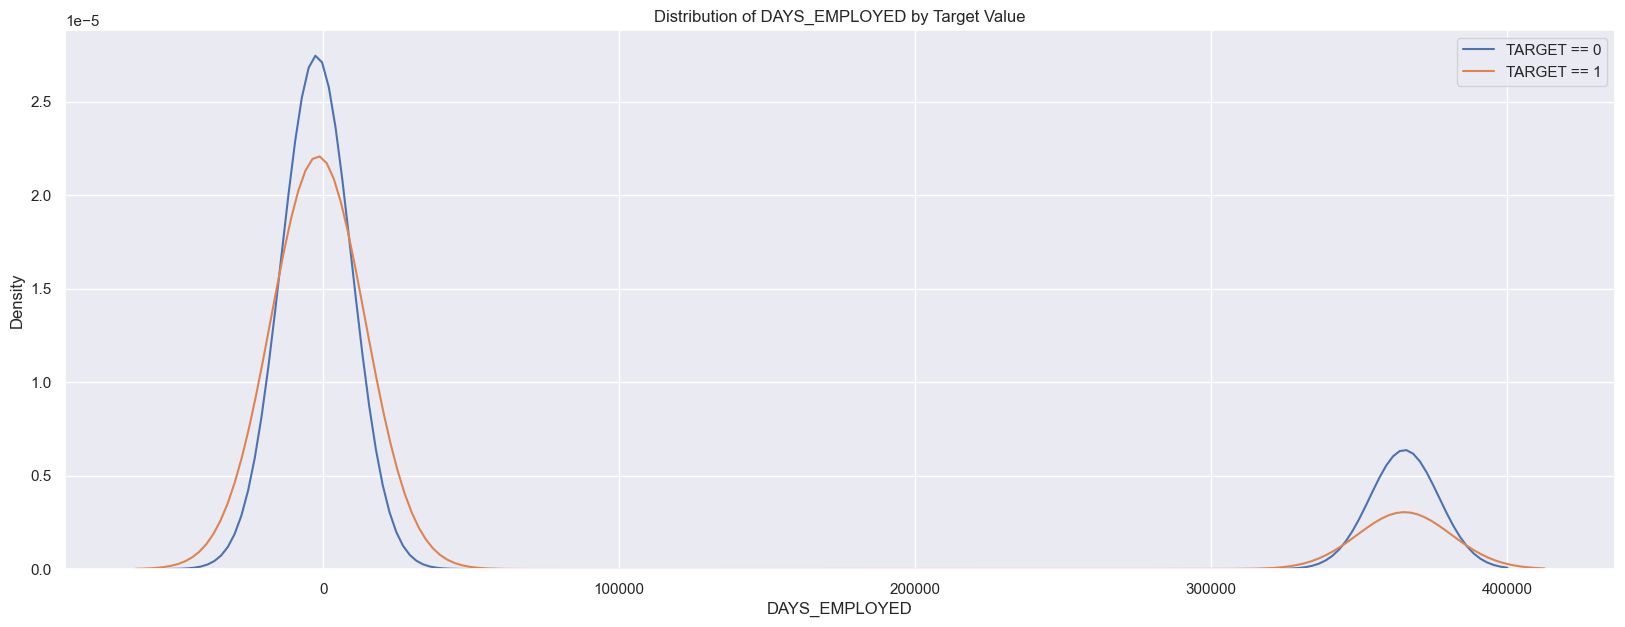

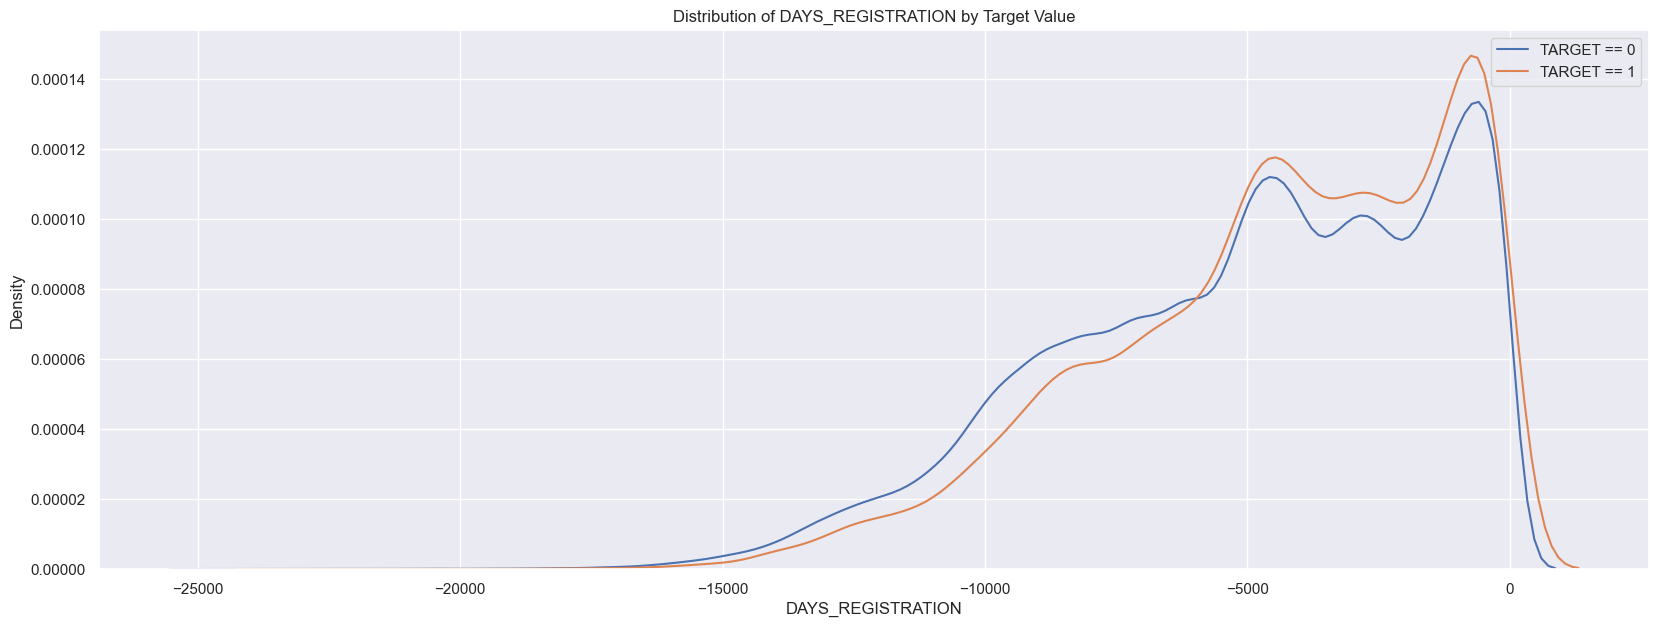

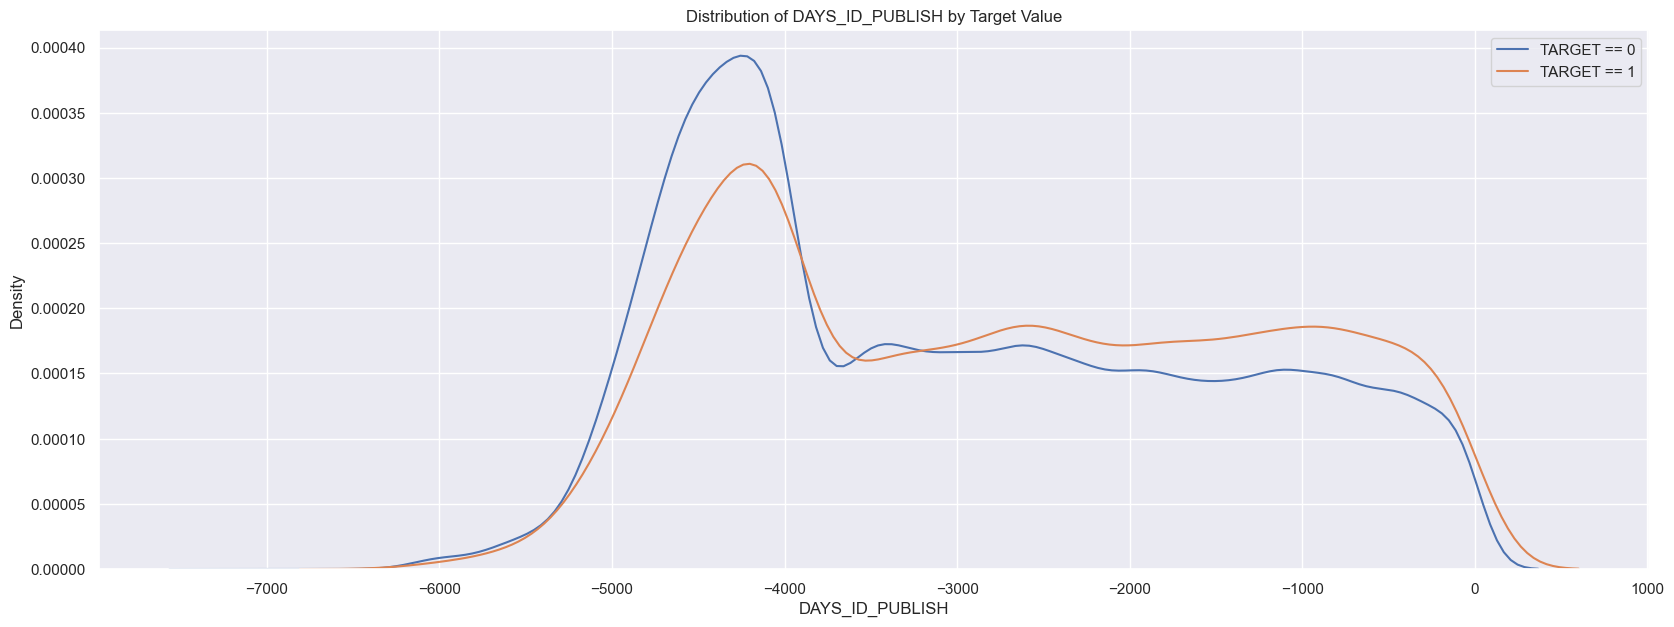

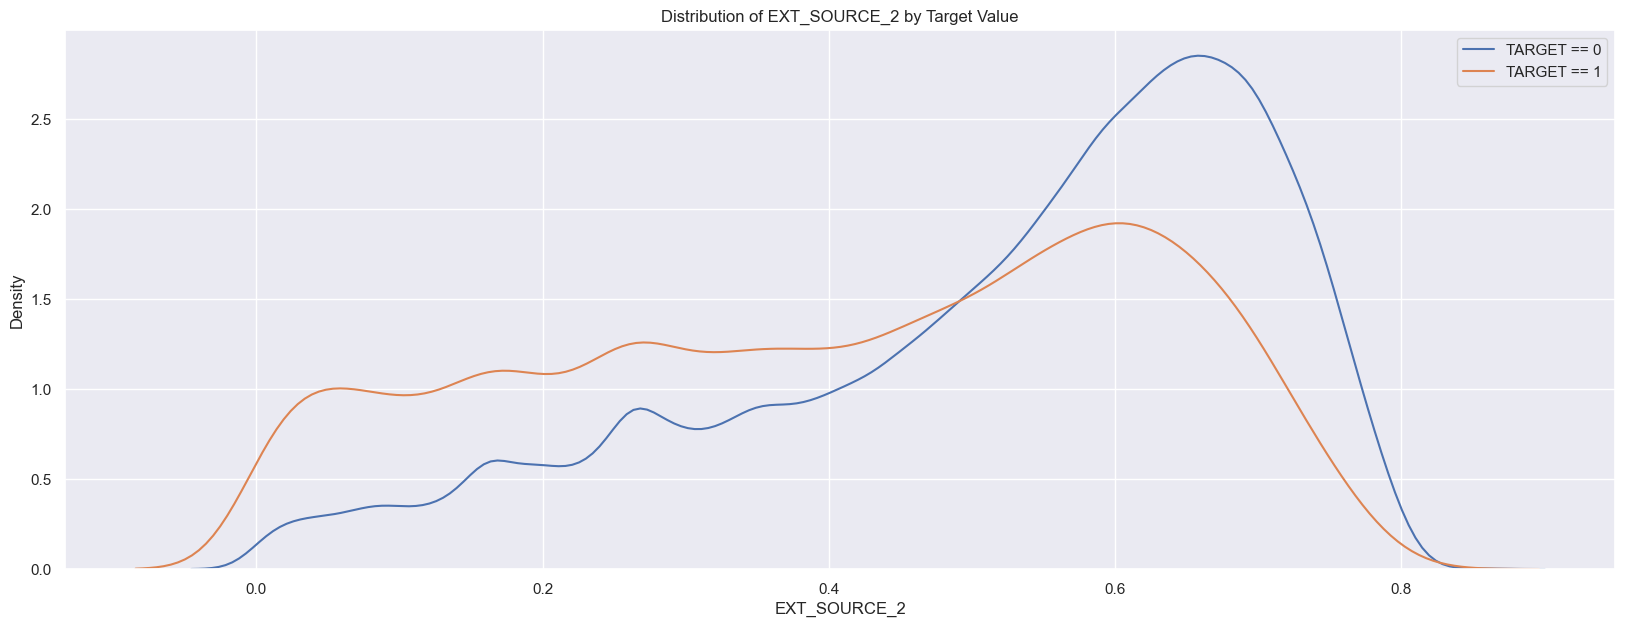

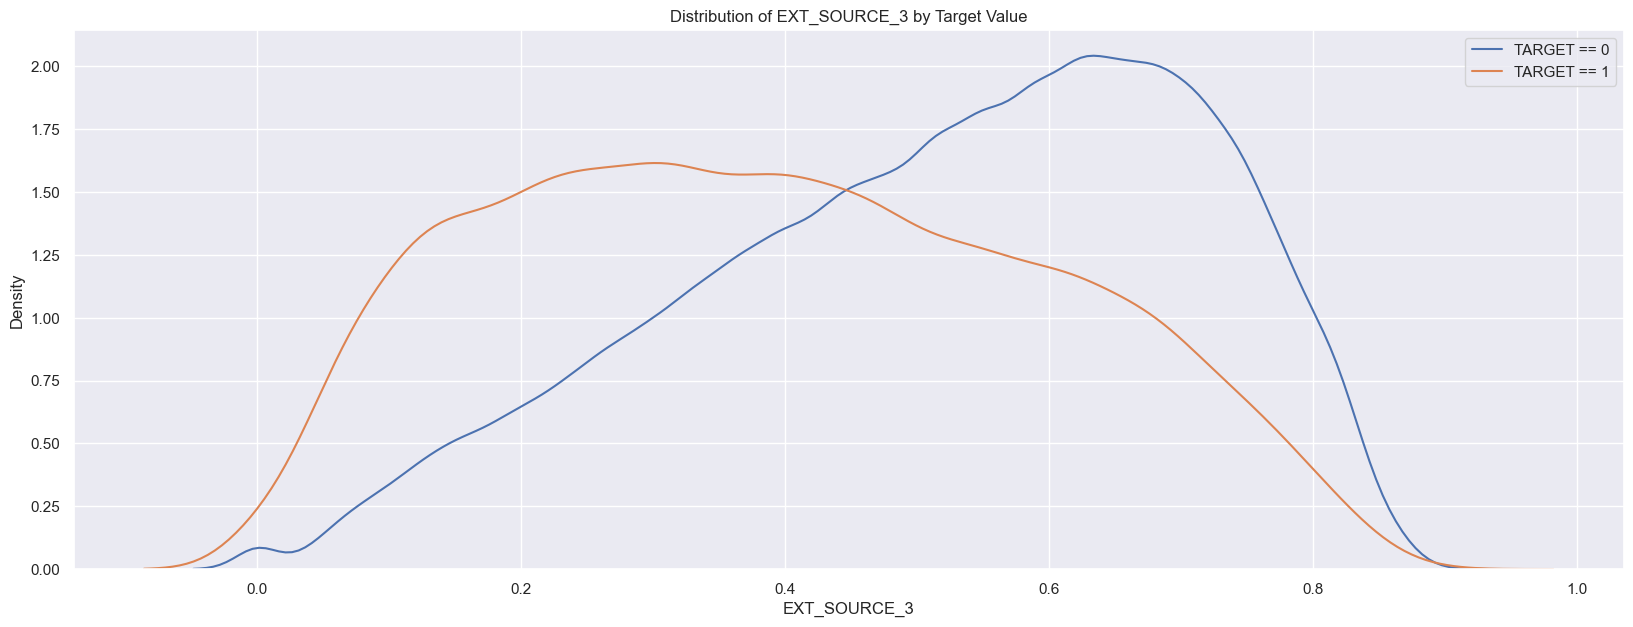

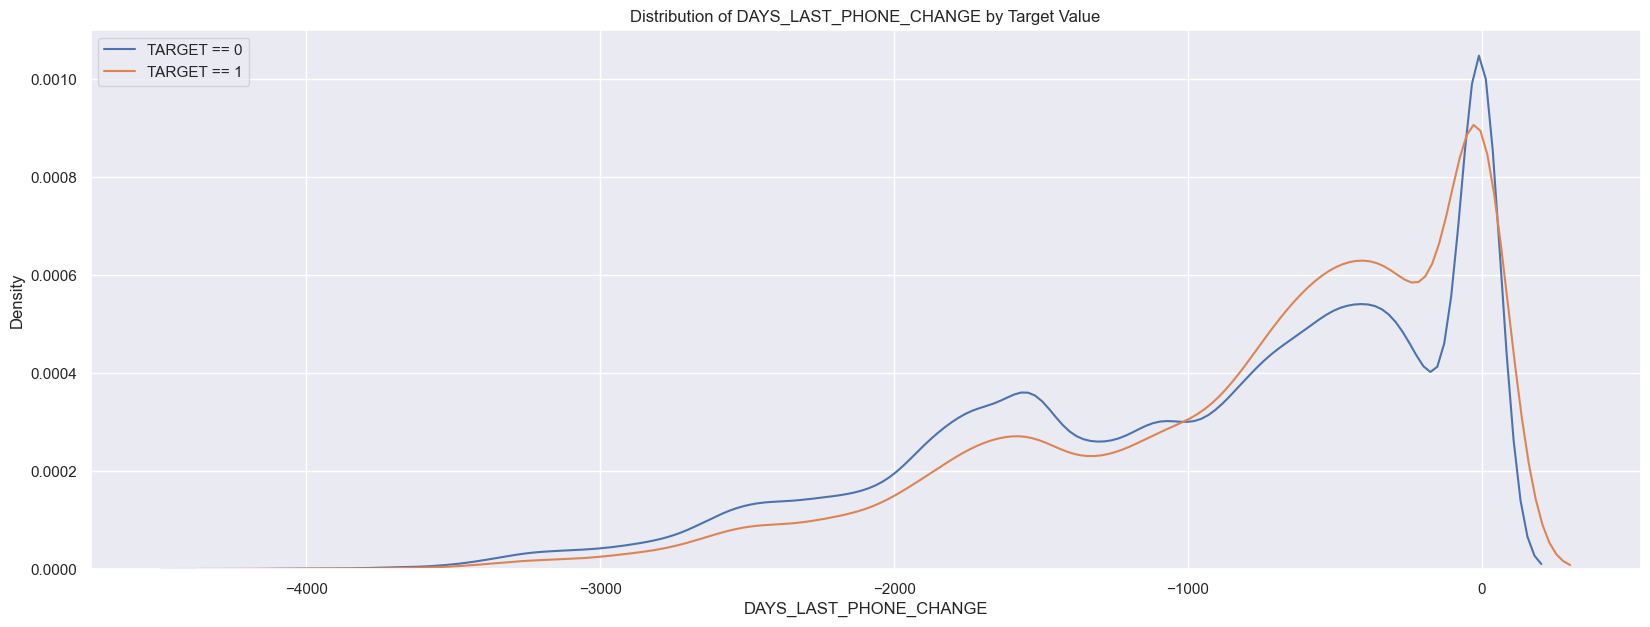

In [52]:
import warnings
warnings.filterwarnings('ignore')

def plot_bivariate_distribution(feature, df):
    plt.figure(figsize=(20, 7))
    sns.kdeplot(df.loc[df['TARGET'] == 0, feature], label = 'TARGET == 0')
    sns.kdeplot(df.loc[df['TARGET'] == 1, feature], label = 'TARGET == 1')
    plt.xlabel(feature); plt.ylabel('Density'); plt.title('Distribution of {} by Target Value'.format(feature))
    plt.legend()
    
# création list to loop over
features = [i for i in df_cleaned.columns if df_cleaned[i].dtype != 'object' and i not in ['TARGET','SK_ID_CURR']]

# Loop over the features and plot each one
for feature in features:
    if feature not in var_discret:
        plot_bivariate_distribution( feature,df=df_cleaned )

### <a name="C34"><font color='teal'>3.4 Features Engineering</font></a> 

In [53]:
import gc
# One-hot encoding for categorical columns with get_dummies
#def one_hot_encoder(df, nan_as_category = True):
#    original_columns = list(df.columns)
#    # exclu les variables qui ne sont de type objet et qui contiennent les char 'FLAG'
#    categorical_columns = [col for col in df.filter(regex='^(?!.*FLAG).*$').columns if df[col].dtype == 'object']
#    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category, drop_first=True)
#    new_columns = [c for c in df.columns if c not in original_columns]
#    return df, new_columns

# Preprocess application_train.csv and application_test.csv
# Optional: Remove 4 applications with XNA CODE_GENDER (train set)
df_cleaned = df_cleaned[df_cleaned['CODE_GENDER'] != 'XNA']

# Categorical features with Binary encode (0 or 1; two categories)
for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
    df_cleaned[bin_feature], uniques = pd.factorize(df_cleaned[bin_feature])
# Categorical features with One-Hot encode
#df_cleaned, cat_cols = one_hot_encoder(df_cleaned, nan_as_category = False)

# NaN values for DAYS_EMPLOYED: 365.243 -> nan
df_cleaned['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)
# Some simple new features (percentages)
#df_cleaned['DAYS_EMPLOYED_PERC'] = df_cleaned['DAYS_EMPLOYED'] / df_cleaned['DAYS_BIRTH']
df_cleaned['INCOME_CREDIT_PERC'] = df_cleaned['AMT_INCOME_TOTAL'] / df_cleaned['AMT_CREDIT']
df_cleaned['ANNUITY_INCOME_PERC'] = df_cleaned['AMT_ANNUITY'] / df_cleaned['AMT_INCOME_TOTAL']
df_cleaned['PAYMENT_RATE'] = df_cleaned['AMT_ANNUITY'] / df_cleaned['AMT_CREDIT']

df_cleaned['PERC_CREDIT_GOODS_PRICE'] = df_cleaned['AMT_CREDIT'] / df_cleaned['AMT_GOODS_PRICE']

# revenu par enfant
df_cleaned['INCOME_PER_CHILDREN'] = df_cleaned['AMT_INCOME_TOTAL'] / (df_cleaned['CNT_CHILDREN']+1)

# ratio d'enfant
df_cleaned['CHIDREN_RATE'] = df_cleaned['CNT_CHILDREN'] / df_cleaned['CNT_FAM_MEMBERS']

# ratio defaillance
#df_cleaned['DEFOBS_30_RATE'] = df_cleaned['DEF_30_CNT_SOCIAL_CIRCLE'] / df_cleaned['OBS_30_CNT_SOCIAL_CIRCLE']

#Ratio OBS et ratio DEF
df_cleaned['DEF_RATE'] = df_cleaned['DEF_60_CNT_SOCIAL_CIRCLE']/df_cleaned['DEF_30_CNT_SOCIAL_CIRCLE'] 
df_cleaned['OBS_RATE'] = df_cleaned['OBS_60_CNT_SOCIAL_CIRCLE']/df_cleaned['OBS_30_CNT_SOCIAL_CIRCLE'] 

gc.collect()

37652

In [54]:
df_cleaned.shape

(307507, 80)

### <a name="C36"><font color='teal'>3.6 Normalité</font></a> 

In [55]:
from scipy import stats

numCol = df.select_dtypes(include = [np.number]).columns

df_normalite = pd.DataFrame()
list_col = []
list_Shapiro = []
list_kstest = []
list_skewness = []

for i,col in enumerate([x for x in numCol]):
    list_col.append(col)
    list_Shapiro.append(stats.shapiro(df[col].dropna())[1])
    list_kstest.append(stats.kstest(df[col].dropna(), 'norm')[1])
    list_skewness.append(stats.skew(df[col].dropna()) )
    
df_normalite['Colonne'] = list_col
df_normalite['pvalue_Shapiro'] = list_Shapiro
df_normalite['pvalue_Kolmogorov-Smirnov'] = list_kstest
df_normalite['skewness_empirique'] = list_skewness

del list_kstest,list_col,list_Shapiro,list_skewness

df_normalite

,Colonne,pvalue_Shapiro,pvalue_Kolmogorov-Smirnov,skewness_empirique
0,TARGET,0.0,0.0,3.078118
1,CNT_CHILDREN,0.0,0.0,1.974624
2,AMT_INCOME_TOTAL,0.0,0.0,391.555503
3,AMT_CREDIT,0.0,0.0,1.234755
4,AMT_ANNUITY,0.0,0.0,1.579755
5,AMT_GOODS_PRICE,0.0,0.0,1.348992
6,REGION_POPULATION_RELATIVE,0.0,0.0,1.488026
7,DAYS_BIRTH,0.0,0.0,-0.115667
8,DAYS_EMPLOYED,0.0,0.0,1.664317
9,DAYS_REGISTRATION,0.0,0.0,-0.590869


### <a name="C37"><font color='teal'>3.7 Distribution </font></a> 

### <a name="C38"><font color='teal'>3.8 Multi Colinéarité</font></a> 

In [56]:
df_cleaned.corr().style.background_gradient()

,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_CREDIT_PERC,ANNUITY_INCOME_PERC,PAYMENT_RATE,PERC_CREDIT_GOODS_PRICE,INCOME_PER_CHILDREN,CHIDREN_RATE,DEF_RATE,OBS_RATE
TARGET,1.000000,-0.054710,-0.021850,0.006146,0.019189,-0.003982,-0.030371,-0.012818,-0.039647,-0.037225,0.078242,0.074957,0.041976,0.051457,0.000534,0.045984,0.028533,0.000370,-0.023801,-0.001759,0.009310,0.058901,0.060895,0.005575,0.006941,0.002819,0.044394,0.050992,0.032517,-0.160471,-0.178926,0.009136,0.032261,0.009027,0.031295,0.055219,0.005417,0.044341,-0.002672,-0.000316,-0.028603,-0.001520,-0.008042,-0.004353,-0.001414,-0.004230,-0.000756,-0.011583,-0.009464,-0.006536,-0.011615,-0.003378,-0.007953,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000787,-0.012460,-0.002022,0.019934,-0.001816,0.014262,0.012703,0.069434,-0.012529,0.021224,0.016799,-0.002150
CODE_GENDER,-0.054710,1.000000,-0.345848,-0.044374,-0.047387,-0.074730,-0.021597,-0.076990,-0.022512,-0.014055,-0.148067,-0.092562,-0.077187,-0.000132,0.002503,-0.157245,-0.033942,0.006020,0.019503,-0.018231,-0.080551,0.017881,0.017284,-0.023690,-0.103456,-0.106078,-0.048254,-0.137577,-0.133271,0.014617,0.023043,0.007268,0.018001,0.007177,0.014755,-0.025283,0.001520,0.087275,0.002693,-0.003261,0.100760,0.002058,-0.249800,0.008068,-0.000874,-0.004833,-0.000852,-0.040452,-0.000949,-0.020892,-0.000066,-0.003773,-0.022211,-0.004633,-0.003259,-0.023911,-0.003181,-0.001142,0.001559,-0.008932,0.007465,0.018267,-0.073775,0.118057,-0.071913,0.002587,-0.078739,-0.037674,-0.000747,-0.000579
FLAG_OWN_CAR,-0.021850,-0.345848,1.000000,0.002820,0.102037,0.083381,0.116226,0.141589,0.120306,0.041313,0.129883,0.023114,0.087778,0.013661,-0.002512,0.154659,0.011463,-0.006644,-0.007595,0.032106,0.149912,-0.022676,-0.021414,-0.000667,0.038938,0.046353,0.003125,0.076084,0.088064,0.053821,-0.015508,0.003283,-0.015191,0.003194,-0.015549,-0.039089,-0.000445,-0.069995,-0.001144,-0.013661,-0.106011,0.000958,0.228371,-0.011068,0.000891,-0.000456,0.003552,0.080648,0.003411,0.045910,0.001984,-0.002476,-0.000097,0.002184,0.007299,0.006741,0.002670,0.000572,0.000243,0.020488,-0.009941,-0.036350,0.026891,-0.062271,-0.005245,-0.036459,0.077720,0.095941,-0.018112,-0.000104
FLAG_OWN_REALTY,0.006146,-0.044374,0.002820,1.000000,0.002370,-0.002934,0.039266,0.005221,0.045535,-0.015170,0.119152,0.030658,0.025226,-0.006664,0.001198,0.070026,0.114064,-0.008526,0.041521,-0.029249,-0.007345,-0.001285,-0.001880,0.036300,0.032314,0.018322,0.061707,0.061885,0.035987,-0.002573,-0.040293,-0.018982,-0.009390,-0.018868,-0.008951,-0.027018,-0.003236,0.036826,-0.002080,0.011921,-0.041570,-0.003094,0.035074,0.003512,-0.003171,0.035201,0.001071,0.057484,0.054677,0.035729,0.092271,0.014207,0.087687,0.019364,0.025130,0.000173,0.004119,0.009266,-0.007475,0.004486,-0.015451,-0.067444,-0.028800,0.020149,-0.047265,-0.029951,-0.004351,0.005727,-0.005553,0.000114
CNT_CHILDREN,0.019189,-0.04

In [57]:
# Function to list features that are correlated
# Adds the first of the correlated pair only (not both)
def correlatedFeatures(dataset, threshold):
    correlated_columns = set()
    correlations = dataset.corr()
    for i in range(len(correlations)):
        for j in range(i):
            if abs(correlations.iloc[i,j]) > threshold:
                correlated_columns.add(correlations.columns[i]+'____'+correlations.index[j]+'____'+str(round(correlations.iloc[i,j],2)))
    return correlated_columns

In [58]:
features_corr = correlatedFeatures(df_cleaned,0.8)

features_corre = pd.DataFrame(features_corr)[0].str.split('____',expand=True)
features_corre.rename(columns={0:'colonne1', 1:'colonne2', 2:'correltion1_2'}, inplace=True)

target_corr = df_cleaned.corr().TARGET.reset_index()
target_corr.rename(columns = {'index':'colonne','TARGET':'correlation'}, inplace=True)

features_corre = features_corre.merge(
    right = target_corr, how = 'left',left_on ='colonne1', right_on = 'colonne' )\
.rename(columns = {'correlation':'CorrelCol1Target'}).drop(columns = ['colonne'])

features_corre = features_corre.merge(
    right = target_corr, how = 'left',left_on ='colonne2', right_on = 'colonne' )\
.rename(columns = {'correlation':'CorrelCol2Target'}).drop(columns = ['colonne'])


features_corre.sort_values(by = ['correltion1_2'],ascending=False)

,colonne1,colonne2,correltion1_2,CorrelCol1Target,CorrelCol2Target
8,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.0,0.009027,0.009136
7,AMT_GOODS_PRICE,AMT_CREDIT,0.99,-0.039647,-0.030371
1,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.95,0.060895,0.058901
3,CHIDREN_RATE,CNT_CHILDREN,0.95,0.021224,0.019189
4,INCOME_PER_CHILDREN,AMT_INCOME_TOTAL,0.91,-0.012529,-0.003982
2,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88,0.009310,0.019189
0,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86,0.031295,0.032261
9,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.86,0.002819,0.006941
6,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.83,0.032517,0.050992
5,CHIDREN_RATE,CNT_FAM_MEMBERS,0.81,0.021224,0.009310


In [59]:
# Ajout de nouvelle colonne à supprimer dans la liste col_to_drop
col_to_drop.extend([
                    'REGION_RATING_CLIENT', 'LIVE_REGION_NOT_WORK_REGION', 'LIVE_CITY_NOT_WORK_CITY', 
                   ])

df_cleaned.drop(columns=['REGION_RATING_CLIENT', 'LIVE_REGION_NOT_WORK_REGION', 'LIVE_CITY_NOT_WORK_CITY', ],
                inplace=True)

# suppression des colonnes qui ne peux etre ajouter à col_to_drop
df_cleaned.drop(columns=['OBS_60_CNT_SOCIAL_CIRCLE', 'AMT_CREDIT','CNT_CHILDREN',#a garder pour autres colonnes
                         'DEF_60_CNT_SOCIAL_CIRCLE', 'CNT_FAM_MEMBERS', #a garder pour autres colonnes
                        ], inplace=True)

# <a name="C4"><font color='green'>**Partie 4 : Feature Selection**</font></a> 

### <a name="C41"><font color='green'>4.1 Create X & y</font></a> 

In [60]:
X = df_cleaned.dropna().drop(columns = ['TARGET'])
y = df_cleaned.dropna()['TARGET']#.values
X.shape , y.shape

((22706, 71), (22706,))

In [61]:
# Combien de valeur inf peut-on retrouver dans le dataframe
print('Combien de valeur "inf" dans notre dataframe :',X.apply(lambda x: (x==np.inf).sum() ).sum() )

Combien de valeur "inf" dans notre dataframe : 0


### <a name="C42"><font color='green'>4.2 Train Test Split</font></a> 

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35, stratify = y)
print("Notre dataset d'entrainement est une matrice {} et la cible {}".format(X_train.shape,y_train.shape))
print("Notre dataset de test est une matrice au format {} et la cible {}".format(X_test.shape,y_test.shape) )

print('\n\n\nEncodage Data categorial')

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# regrpouper les modalité qui represente moins de 10 batiment dans une super modalité

# Create an instance of One-hot-encoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore',drop='first' ) #

# Transform X_train categorical
df_cat_train = ohe.fit_transform(X_train.select_dtypes(exclude=np.number) ) 
df_cat_train = pd.DataFrame(df_cat_train,
                            columns = ohe.get_feature_names_out(),
                            index = X_train.index)

# Create X_train encoded data 
X_train_encod = pd.merge(X_train.select_dtypes(include=np.number),
                        df_cat_train, left_index=True, right_index=True) 


# Transform X_test categorical
df_cat_test = ohe.transform(X_test.select_dtypes(exclude=np.number) ) 
df_cat_test = pd.DataFrame(df_cat_test,
                           columns = ohe.get_feature_names_out(),
                           index = X_test.index)

# Create X_test encoded data 
X_test_encod = pd.merge(X_test.select_dtypes(include=np.number),
                        df_cat_test, left_index=True, right_index=True) 

print("Notre dataset d'entrainement est une matrice {} et la cible {} dont {:.2%} de valeur 1".format(X_train_encod.shape,y_train.shape, y_train.mean()))
print("Notre dataset de test est une matrice au format {} et la cible {} dont {:.2%} de valeur 1".format(X_test_encod.shape,y_test.shape, y_test.mean()) )

Notre dataset d'entrainement est une matrice (15894, 71) et la cible (15894,)
Notre dataset de test est une matrice au format (6812, 71) et la cible (6812,)



Encodage Data categorial
Notre dataset d'entrainement est une matrice (15894, 167) et la cible (15894,) dont 10.87% de valeur 1
Notre dataset de test est une matrice au format (6812, 167) et la cible (6812,) dont 10.86% de valeur 1


### <a name="C43"><font color='green'>4.3 Scaling DataSet</font>

In [63]:
from sklearn.preprocessing import StandardScaler # MinMaxScaler,Normalizer

scaler = StandardScaler().fit(X_train_encod)
X_train_scaled = scaler.transform(X_train_encod)
X_test_scaled = scaler.transform(X_test_encod)

### <a name="C44"><font color='green'>4.4 Feature importance</font>

#### <font color='green'>4.4.1 Feature importance based on mean decrease in impurity</font>

In [64]:
from sklearn.ensemble import RandomForestClassifier

#feature_names = [f"feature {i}" for i in scaler.get_feature_names_out() ]
feature_names = [i for i in scaler.get_feature_names_out() ]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=0)

In [65]:
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.013 seconds


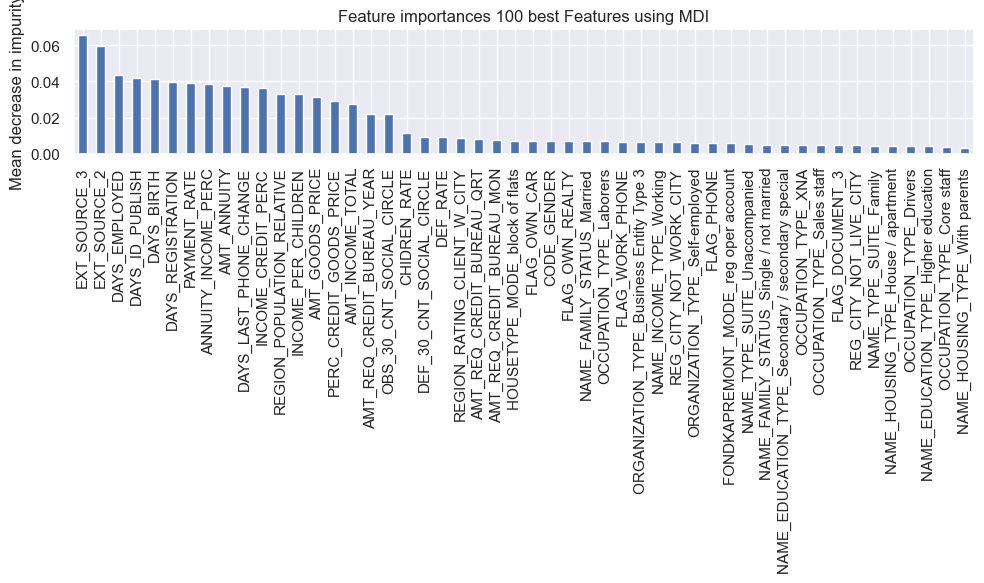

In [66]:
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:50]

fig, ax = plt.subplots()
forest_importances.plot.bar( ax=ax)#yerr=std,
ax.set_title("Feature importances 100 best Features using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [67]:
forestBest = RandomForestClassifier(random_state=0)
featureRemaindFiRF_index = [feature_names.index(f) for f in forest_importances[:22].index]
featureRemaindFiRF_names = [f for f in forest_importances[:22].index]
forestBest.fit(X_train_scaled[:,featureRemaindFiRF_index], y_train)

RandomForestClassifier(random_state=0)

In [68]:
aucRFav = roc_auc_score(y_test, [y for x,y in forest.predict_proba( X_test_scaled )], average ='weighted').round(4)
aucRFapRD = roc_auc_score(y_test, [y for x,y in forestBest.predict_proba( X_test_scaled[:,featureRemaindFiRF_index] )], average ='weighted').round(4)
print("AUC avant: ",aucRFav,"\nAUC après réduction de dimension: ", aucRFapRD
     )
print('\n')
#f1scoreRFav = f1_score(y_test, forest.predict( X_test_scaled ), average ='weighted').round(4)
#f1scoreRFapRD = f1_score(y_test, forestBest.predict( X_test_scaled[:,featureRemaindFiRF_index] ), average ='weighted').round(4)
#print("f1score avant: ",f1scoreRFav,"\nf1score après réduction de dimension: ", f1scoreRFapRD
#     )


AUC avant:  0.6927 
AUC après réduction de dimension:  0.6926




#### <font color='green'>4.4.2 Permutation Feature Importance Regression Logistics</font>

In [69]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X_train_scaled, y_train)
print(
    'accuracy :', model.score(X_test_scaled, y_test).round(5) ,
    'AUC:',roc_auc_score(y_test, [y for x,y in model.predict_proba( X_test_scaled )], average ='weighted').round(5)
)

accuracy : 0.8924 AUC: 0.71521


In [70]:
%%time
from sklearn.inspection import permutation_importance
r = permutation_importance(model, X_test_scaled, y_test,
                           n_repeats=30,
                           random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 1.96 * r.importances_std[i] > 0:
        print(f"{feature_names[i]:<50}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

NAME_EDUCATION_TYPE_Secondary / secondary special 0.004 +/- 0.001
AMT_ANNUITY                                       0.003 +/- 0.001
NAME_EDUCATION_TYPE_Higher education              0.003 +/- 0.001
AMT_GOODS_PRICE                                   0.003 +/- 0.001
OCCUPATION_TYPE_Laborers                          0.002 +/- 0.001
EXT_SOURCE_2                                      0.002 +/- 0.001
EXT_SOURCE_3                                      0.002 +/- 0.001
NAME_TYPE_SUITE_Unaccompanied                     0.001 +/- 0.000
CODE_GENDER                                       0.001 +/- 0.000
PAYMENT_RATE                                      0.001 +/- 0.000
ORGANIZATION_TYPE_Self-employed                   0.001 +/- 0.000
FLAG_OWN_CAR                                      0.001 +/- 0.000
DAYS_ID_PUBLISH                                   0.001 +/- 0.000
NAME_INCOME_TYPE_Working                          0.001 +/- 0.000
INCOME_CREDIT_PERC                                0.001 +/- 0.000
DAYS_EMPLO

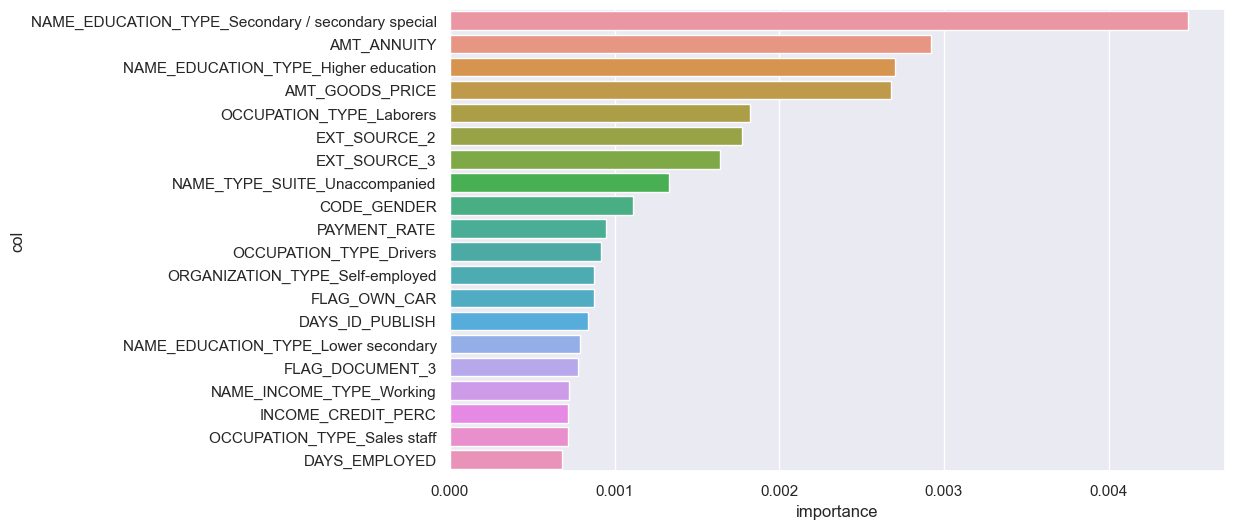

In [71]:
permFeature = pd.DataFrame({'importance':r.importances_mean,'col':scaler.get_feature_names_out() } )
sns.barplot(data = permFeature.sort_values(by='importance',ascending=False).head(20), y='col',x= 'importance');

In [72]:
featureRemaindPFI_names = permFeature.sort_values(by='importance',ascending=False).col[:80].to_list()
LRBest = LogisticRegression()

featureRemaindFiLR = [feature_names.index(f) for f in featureRemaindPFI_names]
LRBest.fit(pd.DataFrame(X_train_scaled).iloc[:,featureRemaindFiLR], y_train)

aucLRav = roc_auc_score(y_test, [y for x,y in model.predict_proba( X_test_scaled )], average ='weighted').round(4)
aucLRapRD = roc_auc_score(y_test, [y for x,y in LRBest.predict_proba( pd.DataFrame(X_test_scaled ).iloc[:,featureRemaindFiLR] )], average ='weighted').round(4)
print("AUC avant: ",aucLRav,"\nAUC après réduction de dimension: ", aucLRapRD
     )
print('\n')

#f1scoreLRav = f1_score(y_test, model.predict( X_test_scaled ), average ='weighted').round(4)
#f1scoreLRapRD = f1_score(y_test, LRBest.predict( pd.DataFrame(X_test_scaled ).iloc[:,featureRemaindFiLR] ), average ='weighted').round(4)
#print("f1 score avant: ",f1scoreLRav,"\nf1 score après réduction de dimension: ", f1scoreLRapRD
#     )

AUC avant:  0.7152 
AUC après réduction de dimension:  0.7246




### Calcul de l'apport d'AUC de chaque feature

In [73]:
AUC_LR_nbfeatures, f1score_LR_nbfeatures = dict(),dict()
list_auc,list_f1score = list(), list()

for c in range(1, X_train_scaled.shape[1]+1 ):
    featureRemaindPFI_names = permFeature.sort_values(by='importance',ascending=False).col[0:c].to_list()
    LRBest = LogisticRegression()

    featureRemaindFiLR = [feature_names.index(f) for f in featureRemaindPFI_names]
    LRBest.fit(pd.DataFrame(X_train_scaled).iloc[:,featureRemaindFiLR], y_train)
    tempAUC = roc_auc_score(y_test, [y for x,y in LRBest.predict_proba( pd.DataFrame(X_test_scaled ).iloc[:,featureRemaindFiLR] )], average ='weighted').round(4)
    AUC_LR_nbfeatures[len(featureRemaindPFI_names)] = tempAUC
    
    tempf1score = roc_auc_score(y_test, LRBest.predict( pd.DataFrame(X_test_scaled ).iloc[:,featureRemaindFiLR] ), average ='weighted').round(4)
    f1score_LR_nbfeatures[len(featureRemaindPFI_names)] = tempf1score
    
    list_auc.append(tempAUC)
    list_f1score.append(tempf1score)

In [74]:
AUC_LR_delta = pd.DataFrame({'value' : [y-x for x,y in zip(list_auc[:-1], list_auc[1:])]},
                           index=featureRemaindPFI_names[1:])


F1score_LR_delta = pd.DataFrame({'value' : [y-x for x,y in zip(list_f1score[:-1], list_f1score[1:])]},
                                index=featureRemaindPFI_names[1:])

#AUC_LR_delta.sort_values(ascending=False, by= 'value').head(54)

<Axes: >

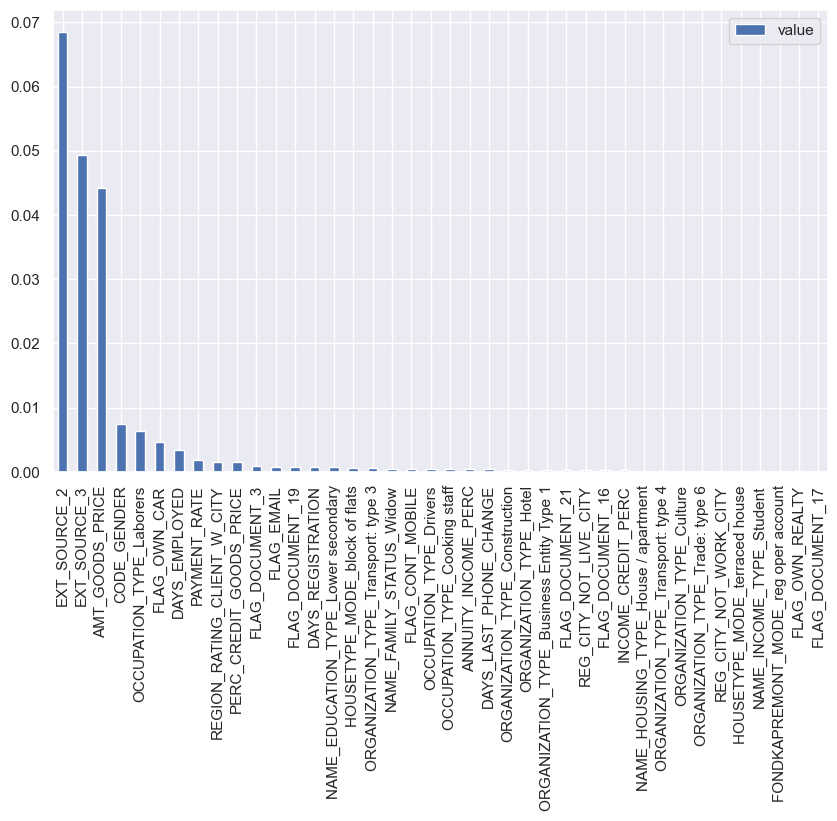

In [75]:
AUC_LR_delta.sort_values(ascending=False, by= 'value').head(40).plot(kind='bar')

In [76]:
nbColKeep = (AUC_LR_delta.sort_values(ascending=False, by= 'value')>0.001).value.sum()
nbColKeep

11

In [77]:
featureRemaindFiLR = AUC_LR_delta.sort_values(ascending=False, by= 'value').head(nbColKeep).index
LRBest2 = LogisticRegression()

featureRemaindFiLR_index = [feature_names.index(f) for f in featureRemaindFiLR]
LRBest2.fit(pd.DataFrame(X_train_scaled).iloc[:,featureRemaindFiLR_index], y_train)
roc_auc_score(y_test, [y for x,y in LRBest2.predict_proba( pd.DataFrame(X_test_scaled ).iloc[:,featureRemaindFiLR_index] )], average ='weighted').round(4)

0.7221

In [78]:
featureRemaindFiLR_names = list()
for f in df_cleaned.columns:
    for ff in AUC_LR_delta.sort_values(ascending=False, by= 'value').head(nbColKeep).index:
        if f in ff:
            featureRemaindFiLR_names.append(f)

featureRemaindFiLR_names = list(set( featureRemaindFiLR_names ))
print('Le nombre de features conservé:',len( featureRemaindFiLR_names ))

Le nombre de features conservé: 11


In [79]:
np.array(featureRemaindFiLR_names)

array(['FLAG_DOCUMENT_3', 'PERC_CREDIT_GOODS_PRICE', 'EXT_SOURCE_2',
       'FLAG_OWN_CAR', 'AMT_GOODS_PRICE', 'OCCUPATION_TYPE',
       'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_3', 'CODE_GENDER',
       'PAYMENT_RATE', 'DAYS_EMPLOYED'], dtype='<U27')

In [80]:
del nbColKeep
gc.collect()

13803

#### <font color='green'>4.4.3 Selecting Features with Sequential Feature Selection </font>

In [81]:
from lightgbm import LGBMClassifier as lgbmc
from sklearn.feature_selection import SequentialFeatureSelector

sfsmodel = lgbmc( )
sfsmodel.fit(X_train_scaled, y_train)

print("Score AUC avant reduction :", 
      roc_auc_score(y_test, [y for x,y in sfsmodel.predict_proba( X_test_scaled )], average ='weighted').round(4))

Score AUC avant reduction : 0.7067


In [82]:
%%time
tic_fwd = time.time()
sfs_forward = SequentialFeatureSelector(
    sfsmodel, n_features_to_select='auto', 
    direction="forward",n_jobs=-1,tol = 0.0002,
    scoring = 'roc_auc_ovr_weighted'
).fit(X_train_scaled, y_train)
toc_fwd = time.time()

CPU times: total: 14.5 s
Wall time: 2min 23s


In [83]:
print("Nombre de features conservées :", np.sum(sfs_forward.get_support()))
#print("\n")

sfsmodel.fit(X_train_scaled[ :, sfs_forward.get_support()], y_train)
y_pred = [y for x,y in sfsmodel.predict_proba( X_test_scaled[:,sfs_forward.get_support()] )]

print("Score AUC apres reduction :", roc_auc_score(y_test, y_pred, average ='weighted').round(4),"\n")

Nombre de features conservées : 7
Score AUC apres reduction : 0.694 



In [84]:
print(
    "Features selected by forward sequential selection: "
    f"{scaler.get_feature_names_out()[sfs_forward.get_support()]}"
)
print(f"Done in {toc_fwd - tic_fwd:.3f}s")

Features selected by forward sequential selection: ['EXT_SOURCE_2' 'EXT_SOURCE_3' 'DEF_30_CNT_SOCIAL_CIRCLE'
 'FLAG_DOCUMENT_9' 'PAYMENT_RATE' 'NAME_INCOME_TYPE_Working'
 'NAME_EDUCATION_TYPE_Higher education']
Done in 143.221s


In [85]:
featureRemaindFPLightGBM_names = list()
for f in df_cleaned.columns:
    for ff in scaler.get_feature_names_out()[sfs_forward.get_support()]:
        if f in ff:
            featureRemaindFPLightGBM_names.append(f)

featureRemaindFPLightGBM_names = list(set( featureRemaindFPLightGBM_names ))
print('Le nombre de features conservé:',len( featureRemaindFPLightGBM_names ))

Le nombre de features conservé: 7


In [86]:
np.array(featureRemaindFPLightGBM_names)

array(['FLAG_DOCUMENT_9', 'NAME_INCOME_TYPE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'EXT_SOURCE_3', 'PAYMENT_RATE', 'EXT_SOURCE_2',
       'NAME_EDUCATION_TYPE'], dtype='<U24')

#### <font color='green'>4.4.4 Others ways to select Feature </font>

#### <font color='green'>4.4.5 Permutation Feature Importance pipeline </font>

In [87]:
%%time
from sklearn.compose import ColumnTransformer , make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingClassifier
from lightgbm import LGBMClassifier as lgbmc

#Numerical featues
numeric_features = make_column_selector(dtype_include=np.number)
numeric_transformer = Pipeline(
    steps=[('impNumerical', SimpleImputer(strategy="median")) ]
)

# categorials features
categorical_features = make_column_selector(dtype_include="object")
categorical_transformer = Pipeline(
    steps=[
        ('impCat', SimpleImputer(strategy = 'most_frequent')),
        ('ohe', OneHotEncoder(drop = 'first', handle_unknown = 'ignore',sparse=False)),
    ])

# columntransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num",  numeric_transformer, numeric_features),
        ("cat",  categorical_transformer, categorical_features),
    ])

# pipeline
featureImportancePipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model",lgbmc())]
)

modelpipe = featureImportancePipeline.fit(X_train, y_train)

CPU times: total: 2.69 s
Wall time: 349 ms


In [88]:
%%time
r = permutation_importance(modelpipe, X_test, y_test,
                           n_repeats=20,
                           random_state=0)

CPU times: total: 11min 16s
Wall time: 56.8 s


In [89]:
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 1.96 * r.importances_std[i] > 0:
        print(f"{feature_names[i]:<40}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

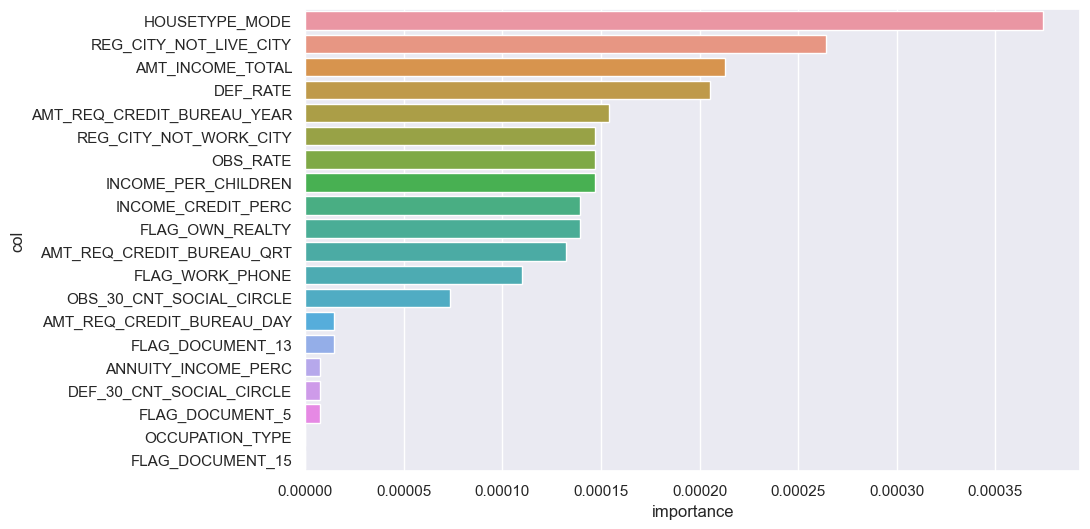

In [90]:
permFeature = pd.DataFrame({'importance':r.importances_mean,'col':X_test.columns} )
sns.barplot(data = permFeature.sort_values(by='importance',ascending=False).head(20), y='col',x= 'importance');

In [91]:
AUC_hist_nbfeatures = dict()
list_auc = list()
for c in range(1,len(X_train.columns)):
    featureRemaindPFI_namespipe = permFeature.sort_values(by='importance',ascending=False).col[0:c].to_list()

    modelpipe.fit(X_train.loc[:,featureRemaindPFI_namespipe], y_train)
    tempAUC = roc_auc_score(y_test, [y for x,y in modelpipe.predict_proba( X_test.loc[:,featureRemaindPFI_namespipe] )], average ='weighted').round(4)
    AUC_hist_nbfeatures[len(featureRemaindPFI_namespipe)] = tempAUC
    list_auc.append(tempAUC)

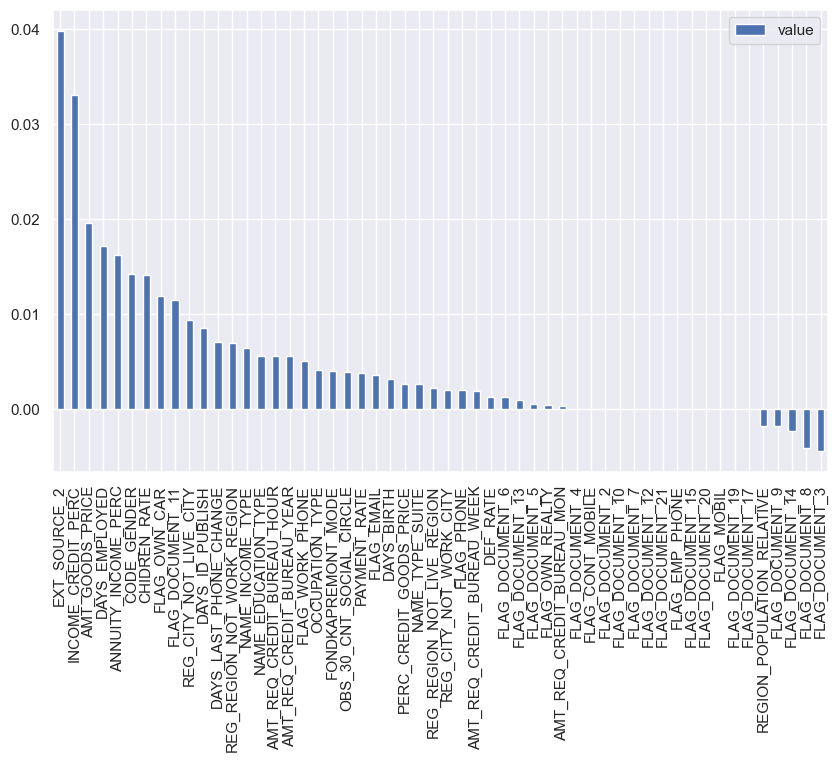

In [92]:
AUC_Hist_delta = pd.DataFrame({'value' : [y-x for x,y in zip(list_auc[:-1], list_auc[1:])]},
                           index=featureRemaindPFI_namespipe[1:])

AUC_Hist_delta.sort_values(ascending=False, by= 'value').head(54).plot(kind='bar');

In [93]:
nbColKeep = (AUC_Hist_delta.sort_values(ascending=False, by= 'value')>0.0001).value.sum()

In [94]:
featureRemaindFihist = AUC_Hist_delta.sort_values(ascending=False, by= 'value').head(nbColKeep).index

modelpipe.fit( X_train.loc[:,featureRemaindFihist], y_train)
roc_auc_score(y_test, [y for x,y in modelpipe.predict_proba( X_test.loc[:,featureRemaindFihist] )], average ='weighted').round(4)

0.6762

In [95]:
del nbColKeep
gc.collect()

20985

### La liste de colonne à converser

In [ ]:
col_a_conserver = [ 
    # object features
    'CODE_GENDER','NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE',
    'NAME_FAMILY_STATUS', 'NAME_INCOME_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
    
    # numericals features
    'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
    'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL',
    'EXT_SOURCE_2', 'EXT_SOURCE_3',
    
    # Add features
    'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 
    'REG_REGION_NOT_LIVE_REGION' ,'REG_REGION_NOT_WORK_REGION', 
]

In [97]:
df_cleaned[['TARGET']+col_a_conserver].corr().style.background_gradient()

,TARGET,PERC_CREDIT_GOODS_PRICE,OBS_30_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_YEAR,FLAG_EMAIL,DAYS_BIRTH,INCOME_CREDIT_PERC,AMT_GOODS_PRICE,FLAG_DOCUMENT_11,AMT_REQ_CREDIT_BUREAU_MON,FLAG_PHONE,AMT_REQ_CREDIT_BUREAU_WEEK,REG_REGION_NOT_LIVE_REGION,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_3,PAYMENT_RATE,CODE_GENDER,FLAG_DOCUMENT_6,FLAG_DOCUMENT_5,DAYS_EMPLOYED,AMT_ANNUITY,INCOME_PER_CHILDREN,FLAG_DOCUMENT_3,FLAG_OWN_CAR,DAYS_REGISTRATION,ANNUITY_INCOME_PERC,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_INCOME_TOTAL,FLAG_DOCUMENT_13,REG_REGION_NOT_WORK_REGION,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,DEF_RATE,REGION_POPULATION_RELATIVE,FLAG_DOCUMENT_9,REG_CITY_NOT_LIVE_CITY,CHIDREN_RATE,REGION_RATING_CLIENT_W_CITY,FLAG_OWN_REALTY,FLAG_WORK_PHONE
TARGET,1.000000,0.069434,0.009136,0.019934,-0.001759,0.078242,-0.001816,-0.039647,-0.004230,-0.012460,-0.023801,0.000787,0.005575,0.032261,-0.178926,0.012703,-0.054710,-0.028603,-0.000316,0.074957,-0.012818,-0.012529,0.044341,-0.021850,0.041976,0.014262,0.000930,-0.003982,-0.011583,0.006941,-0.160471,0.055219,0.051457,0.050992,0.016799,-0.037225,-0.004353,0.044394,0.021224,0.060895,0.006146,0.028533
PERC_CREDIT_GOODS_PRICE,0.069434,1.000000,0.000603,0.035572,0.004471,-0.012217,-0.061387,-0.115659,-0.036180,-0.012117,-0.101919,0.002414,-0.020099,0.009074,-0.029628,-0.137541,0.002587,0.027791,-0.029138,0.013366,-0.063539,-0.036661,0.186264,-0.036459,-0.010647,0.005754,-0.005419,-0.021362,0.000106,-0.018520,-0.064677,0.019877,0.007001,0.010815,-0.002059,-0.043918,-0.003555,0.003405,0.026106,0.025502,-0.029951,-0.132893
OBS_30_CNT_SOCIAL_CIRCLE,0.009136,0.000603,1.000000,0.032535,-0.003082,0.007398,-0.011309,0.000320,-0.003758,0.001575,-0.033510,0.000084,-0.020639,0.329274,-0.000390,-0.015599,0.007268,0.003182,-0.010221,-0.001969,-0.011986,-0.020158,0.026202,0.003283,0.009111,0.013999,0.000490,-0.013102,-0.002900,-0.028852,-0.019251,-0.014774,-0.012469,-0.004615,-0.147194,-0.011180,-0.007670,-0.012609,0.013416,0.030099,-0.018982,-0.012428
AMT_REQ_CREDIT_BUREAU_YEAR,0.019934,0.035572,0.032535,1.000000,0.053358,-0.072004,0.040349,-0.051003,-0.032884,-0.004985,-0.031608,0.018919,-0.017094,0.018518,-0.071434,0.053955,0.018267,0.012227,-0.010233,-0.000535,-0.011316,0.032669,0.048236,-0.036350,-0.024816,-0.059659,-0.004596,0.011688,-0.033800,-0.021584,-0.021999,-0.112721,-0.035102,-0.008006,0.007358,0.000990,-0.010376,-0.004789,-0.048494,0.010687,-0.067444,-0.075904
FLAG_EMAIL,-0.001759,0.004471,-0.003082,0.053358,1.000000,0.088211,0.029388,0.017047,-0.003656,0.025671,0.014662,0.021580,0.018632,-0.003170,-0.052177,0.053893,-0.018231,-0.042661,0.000733,0.030734,0.071708,0.042590,0.012010,0.032106,0.034390,-0.025182,0.003390,0.038378,-0.003436,0.031091,0.023744,-0.019471,0.027505,0.004152,0.004181,0.040014,0.009490,0.014271,0.025572,-0.050777,-0.029249,-0.011514
DAYS_BIRTH,0.078242,-0.012217,0.007398,-0.072004,0.088211,1.000000,0.064730,-0.053444,0.044717,0.001367,-0.042415,-0.001334,0.065487,0.000156,-0.205465,0.092097,-0.148067,-0.407161,0.016776,0.352311,0.009447,-0.063163,0.109681,0.129883,0.331905,-0.081492,0.005286,0.027261,0.026333,0.095821,-0.092009,0.082945,0.272689,0.242408,0.010805,-0.029593,0.018213,0.180386,0.355331,0.008080,0.119152,0.172448
INCOME_CREDIT_PERC,-0.001816,-0.061387,-0.011309,0.040349,0.029388,0.064730,1.000000,-0.333689,0.007756,-0.001731,-0.004823,0.004208,0.022392,-0.006028,-0.039897,0.340345,-0.073775,-0.029595,0.009223,0.029257,-0.259951,0.641884,-0.066337,0.026891,0.023681,-0.387561,0.003978,0.747799,-0.003138,0.040720,-0.001662,0.017153,0.011009,0.020334,0.007563,0.018959,0.004831,0.019842,0.019001,-0.034878,-0.028800,0.012273
AMT_GOODS_PRICE,-0.039647,-0.115659,0.000320,-0.051003,0.017047,-0.053444,-0.333689,1.000000,0.035124,0.056433,0.042187,-0.001008,0.026111,-0.022270,0.047709,-0.533945,-0.022512,-0.050234,-0.005202,-0.093383,0.775110,0.217620,0.074895,0.120306,0.011568,0.368419,-0.003237,0.159610,0.052357,0.053170,0.139369,-0.076307,-0.009270,-0

## Suppression des colonnes trop corrélés entre elles parmi les colonnes conservées

In [98]:
#col_a_conserver = col_a_conserver.extend(['SK_ID_CURR', 'TARGET'])
col_a_conserver = list(set(col_a_conserver))
col_a_conserver

['SK_ID_CURR',
 'TARGET',
 'PERC_CREDIT_GOODS_PRICE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'FLAG_EMAIL',
 'DAYS_BIRTH',
 'INCOME_CREDIT_PERC',
 'AMT_GOODS_PRICE',
 'FLAG_DOCUMENT_11',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'NAME_INCOME_TYPE',
 'FLAG_PHONE',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'FONDKAPREMONT_MODE',
 'REG_REGION_NOT_LIVE_REGION',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_3',
 'PAYMENT_RATE',
 'CODE_GENDER',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_5',
 'DAYS_EMPLOYED',
 'AMT_ANNUITY',
 'INCOME_PER_CHILDREN',
 'FLAG_DOCUMENT_3',
 'FLAG_OWN_CAR',
 'DAYS_REGISTRATION',
 'ANNUITY_INCOME_PERC',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_INCOME_TOTAL',
 'FLAG_DOCUMENT_13',
 'NAME_EDUCATION_TYPE',
 'REG_REGION_NOT_WORK_REGION',
 'OCCUPATION_TYPE',
 'EXT_SOURCE_2',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_ID_PUBLISH',
 'REG_CITY_NOT_WORK_CITY',
 'DEF_RATE',
 'REGION_POPULATION_RELATIVE',
 'FLAG_DOCUMENT_9',
 'REG_CITY_NOT_LIVE_CITY',
 'CHIDREN_RATE',
 'REGION_RATING_CLIENT_W_CITY',
 '

In [99]:
colTemp = [col for col in col_a_conserver if col not in 'SK_ID_CURR']
df_cleaned[colTemp].isna().sum()/df_cleaned.shape[0]

TARGET                         0.000000
PERC_CREDIT_GOODS_PRICE        0.000904
OBS_30_CNT_SOCIAL_CIRCLE       0.003320
AMT_REQ_CREDIT_BUREAU_YEAR     0.135018
FLAG_EMAIL                     0.000000
DAYS_BIRTH                     0.000000
INCOME_CREDIT_PERC             0.000000
AMT_GOODS_PRICE                0.000904
FLAG_DOCUMENT_11               0.000000
AMT_REQ_CREDIT_BUREAU_MON      0.135018
NAME_INCOME_TYPE               0.000000
FLAG_PHONE                     0.000000
AMT_REQ_CREDIT_BUREAU_WEEK     0.135018
FONDKAPREMONT_MODE             0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
DEF_30_CNT_SOCIAL_CIRCLE       0.003320
EXT_SOURCE_3                   0.198256
PAYMENT_RATE                   0.000039
CODE_GENDER                    0.000000
FLAG_DOCUMENT_6                0.000000
FLAG_DOCUMENT_5                0.000000
DAYS_EMPLOYED                  0.180074
AMT_ANNUITY                    0.000039
INCOME_PER_CHILDREN            0.000000
FLAG_DOCUMENT_3                0.000000


In [100]:
del colTemp
gc.collect()

69

### <a name="C45"><font color='green'>4.5 Compute metrics</font>

### Ajout d'autres données

In [101]:
!python --version

Python 3.9.16


#### Best model

# <a name="C5"><font color='purple'>**Partie 5 : Export data**</font></a> 

### <a name="C41"><font color='purple'>4.1 Encoding object colonnes (LabelEncoding/OrdinalEncoder/OneHotEncoding)</font></a> 

### <a name="C52"><font color='purple'>5.2 Rename columns</font></a> 

### <a name="C53"><font color='purple'>5.3 Drop useless columns</font></a> 

### <a name="C54"><font color='purple'>5.4 Export csv</font></a> 

In [102]:
[col for col in col_a_conserver if col not in df.columns]

['SK_ID_CURR',
 'PERC_CREDIT_GOODS_PRICE',
 'INCOME_CREDIT_PERC',
 'PAYMENT_RATE',
 'INCOME_PER_CHILDREN',
 'ANNUITY_INCOME_PERC',
 'DEF_RATE',
 'CHIDREN_RATE']

In [104]:
import joblib
col_a_conserver = [col for col in col_a_conserver if col in df.columns]
joblib.dump(col_a_conserver,'data/cleaned/list_col_to_keep_from_train_application_final.joblib')

['data/cleaned/list_col_to_keep_from_train_application_final.joblib']

</br>

</br>

</br>

</br>

</br>